# DEAP Data Clean and Prep for CNN
Trying to better understand EEG data generally. Clean data and feed to CNN, see what results we get. At first glance, the data looks wildly dependent on subject.

Converting the time series to an image is the best approach right now, since you only get "ground truth" every trial, not every EEG sample

In [15]:
import os
import numpy as np
import pandas as pd
import pickle

## 1. Load Data

In [202]:
subject=32
path = '/media/tris/tris_files/DEAP_dataset/data_preprocessed_python/s'+str(subject)+'.dat'

In [203]:
df = pickle.load(open(path, 'rb'), encoding='latin1')

In [204]:
# test_mat=np.random.rand(3,4,5)
# test_mat[0,:,0:3]

In [205]:
data=df['data']
labels=df['labels']
np.shape(data)

(40, 40, 8064)

## 2. Recurrence Plot
Looking for trends in the time data. Ultimatley, this method won't work because each trial at 128 hz generates a vector of length 8024. This means the recurrence plot is 8024x8024, which maxes out the RAM. Cool on a scaled version, but not super helpful. Plus, only black and white, so less information for the learner.

In [88]:
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot
n=5
data_one_trial=data[n,:,0:2000]
rp = RecurrencePlot(threshold='point', percentage=20)
data_rp = rp.fit_transform(data_one_trial)

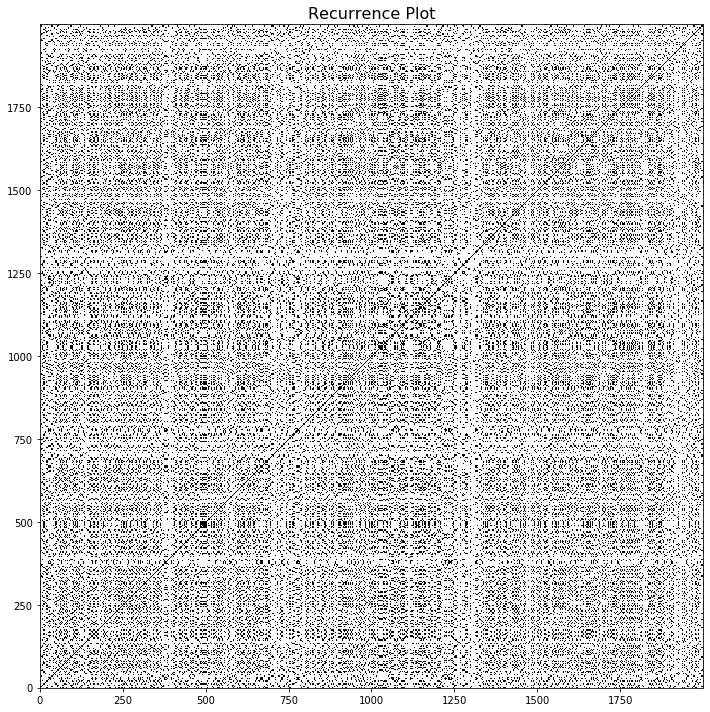

In [89]:
plt.figure(figsize=(10, 10))
plt.imshow(data_rp[20], cmap='binary', origin='lower')
plt.title('Recurrence Plot', fontsize=16)
plt.tight_layout()
plt.show()

Looks stochastic to me dudes

# 3. Gramian Angular Field
Basically a coordinate transform. A [little more](https://www.aaai.org/ocs/index.php/WS/AAAIW15/paper/viewFile/10179/10251) to it than that, but ok. Easier on the RAM bc it doesn't take that huge comparison matrix.

Setup to look over the trials after changing subject manually above. Not perfect, but helps me keep the process straight.

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

In [207]:
# for n in range(0,9):
#     print('GAF-cmap/s02_t0'+str(n+1)+'doot')
# else:
#     print('Final x = %d' % (n))
# LOOK AT ME LEARNING

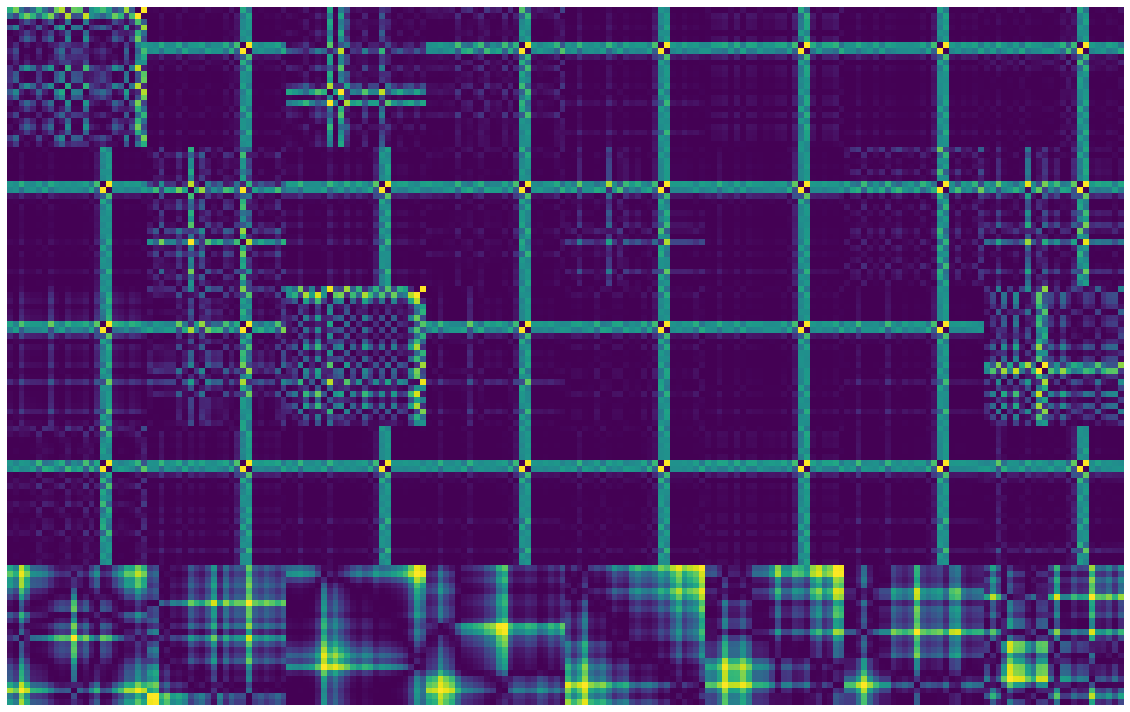

In [208]:
data_one_trial=data[n,:,:]
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=24, method='summation')
X_gasf = gasf.fit_transform(data_one_trial)
#gadf = GramianAngularField(image_size=24, method='difference')
#X_gadf = gadf.fit_transform(data_one_trial)


w = 10
h = 10
fig = plt.figure(figsize=(20, 13))
columns = 8
rows = 5



# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = X_gasf[i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    #ax[-1].set_title("ax:"+str(i))  # set title
    plt.imshow(img, cmap='viridis', origin='lower') #binary_r
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=-.06)
plt.show()  # finally, render the plot

/media/tris/tris_files/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/media/tris/tris_files/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/media/tris/tris_files/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

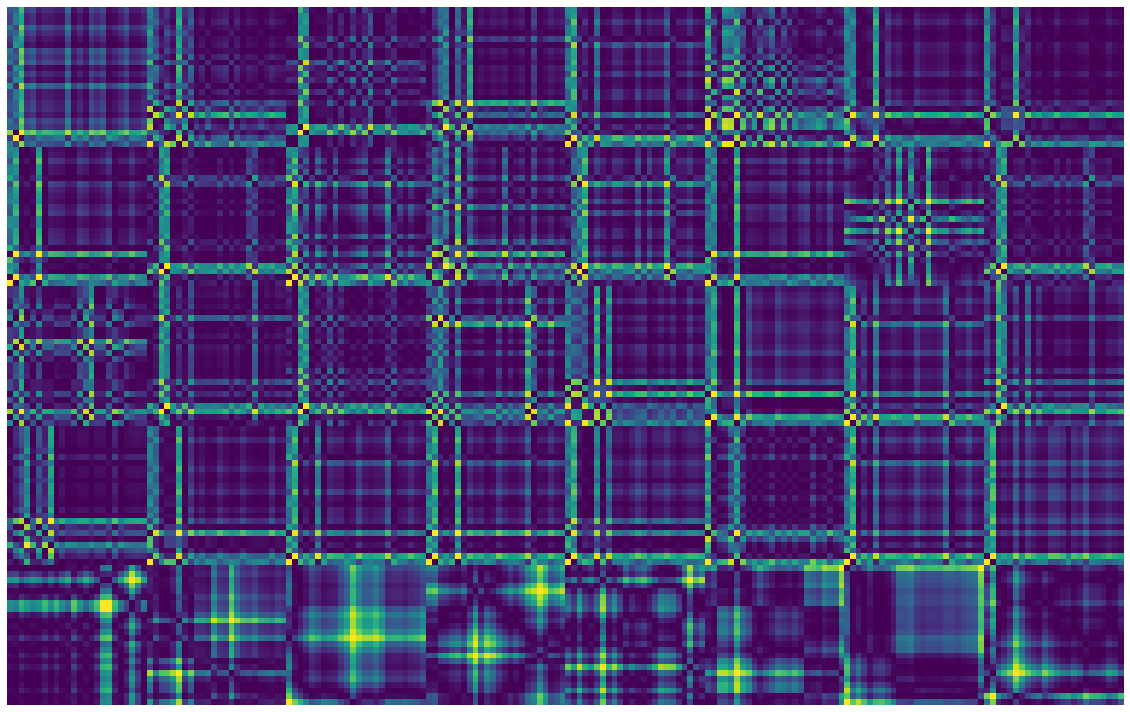

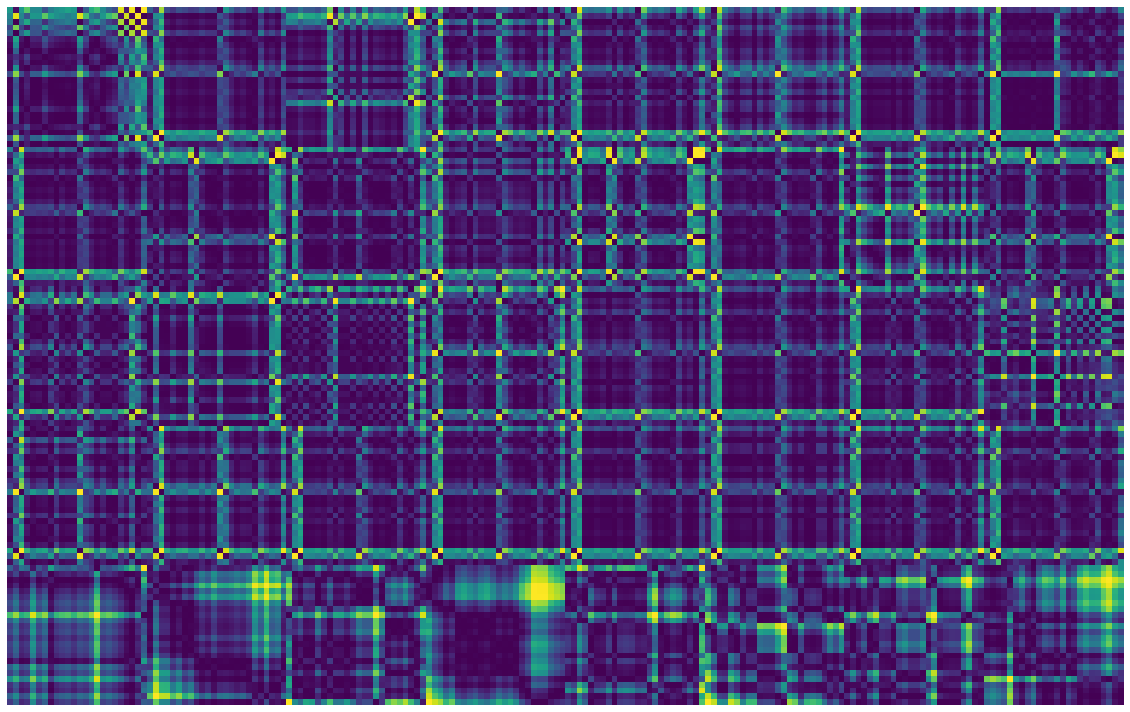

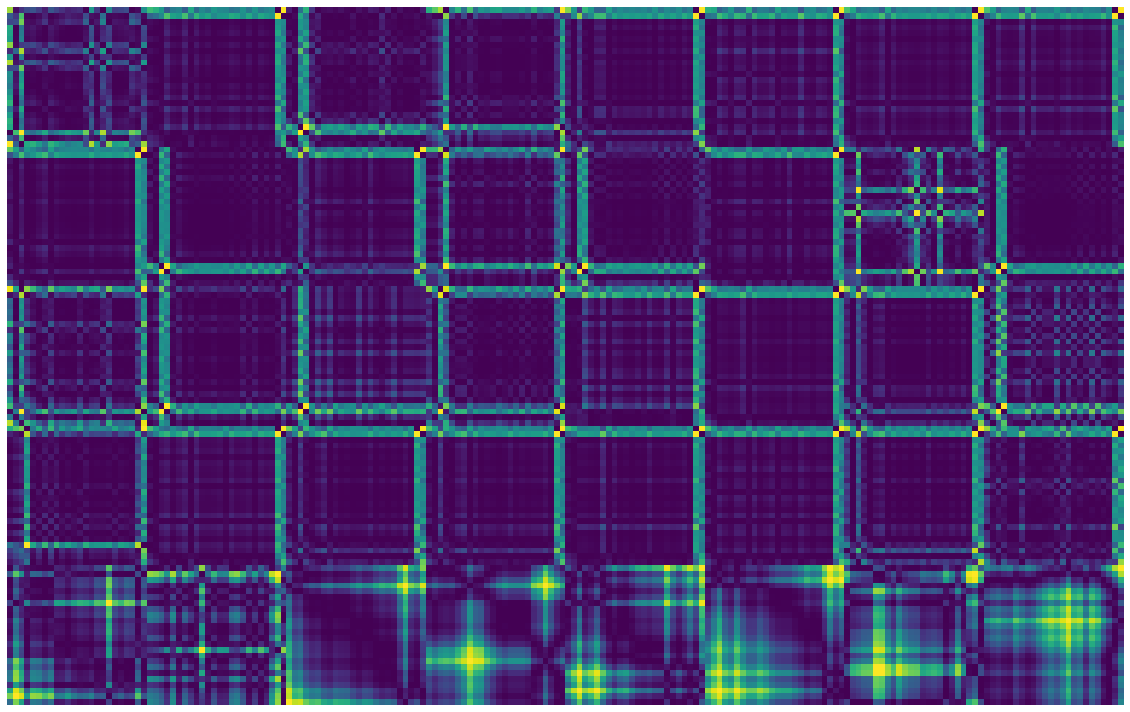

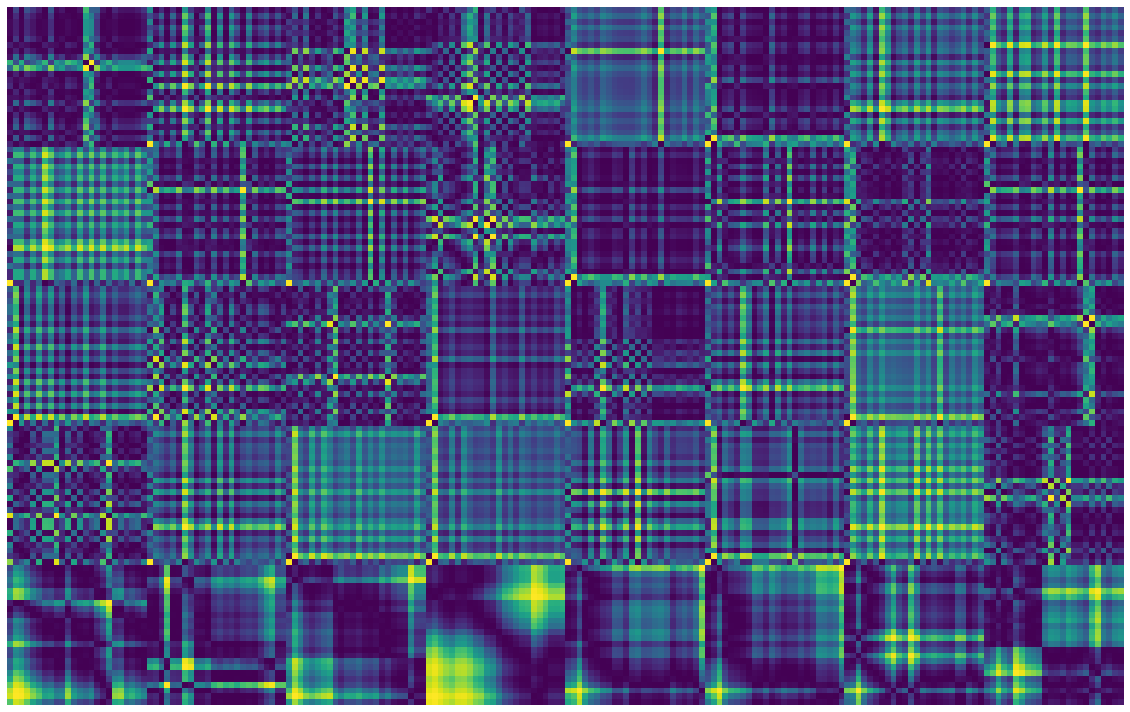

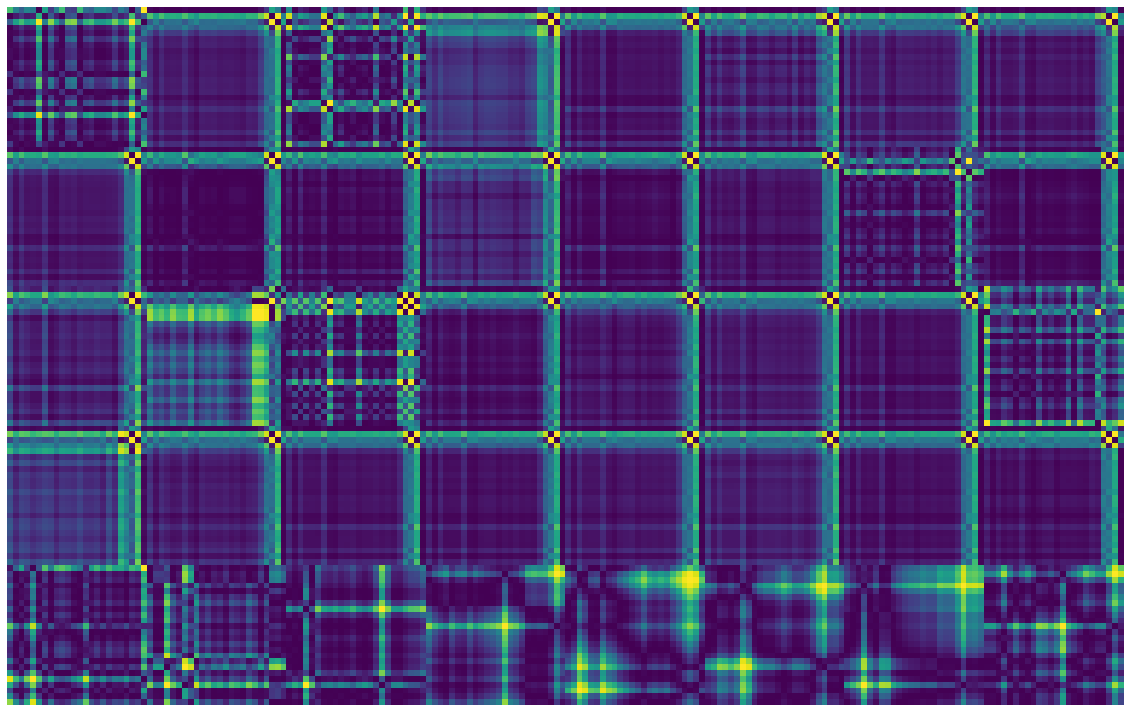

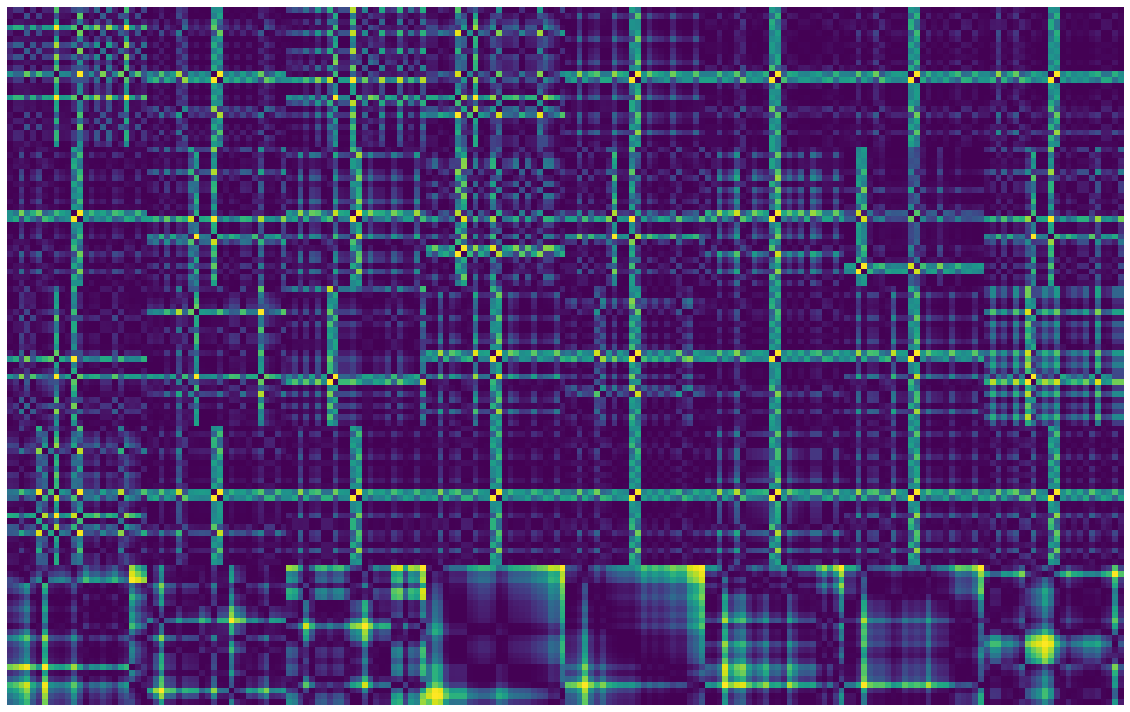

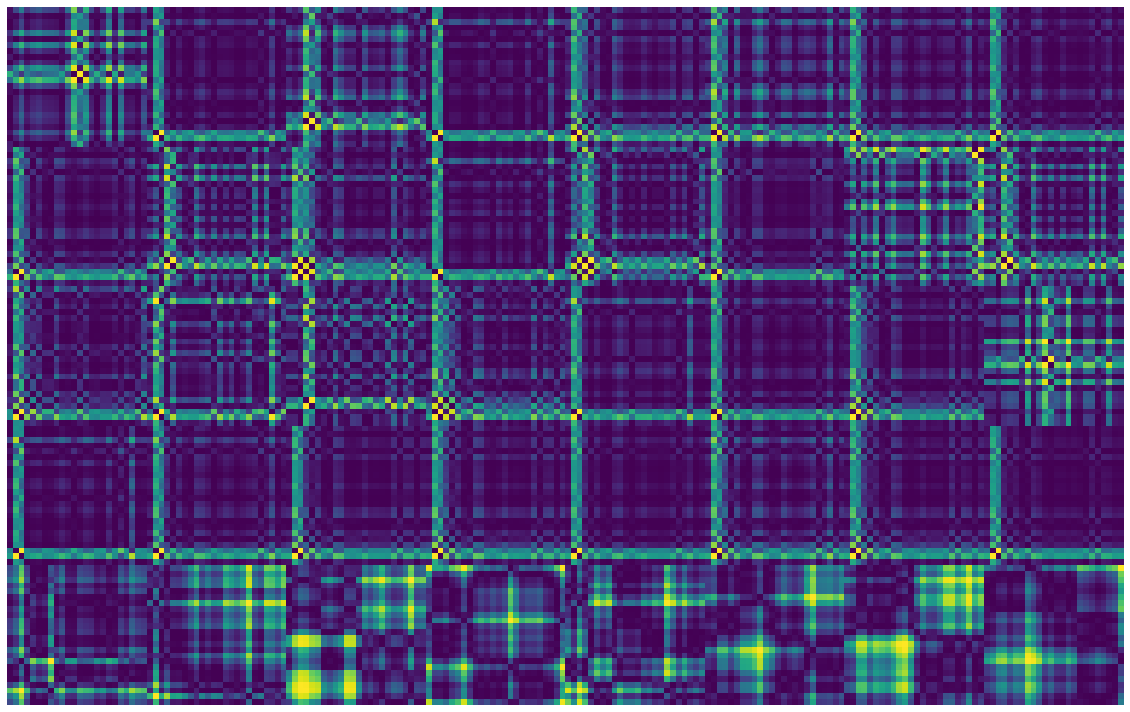

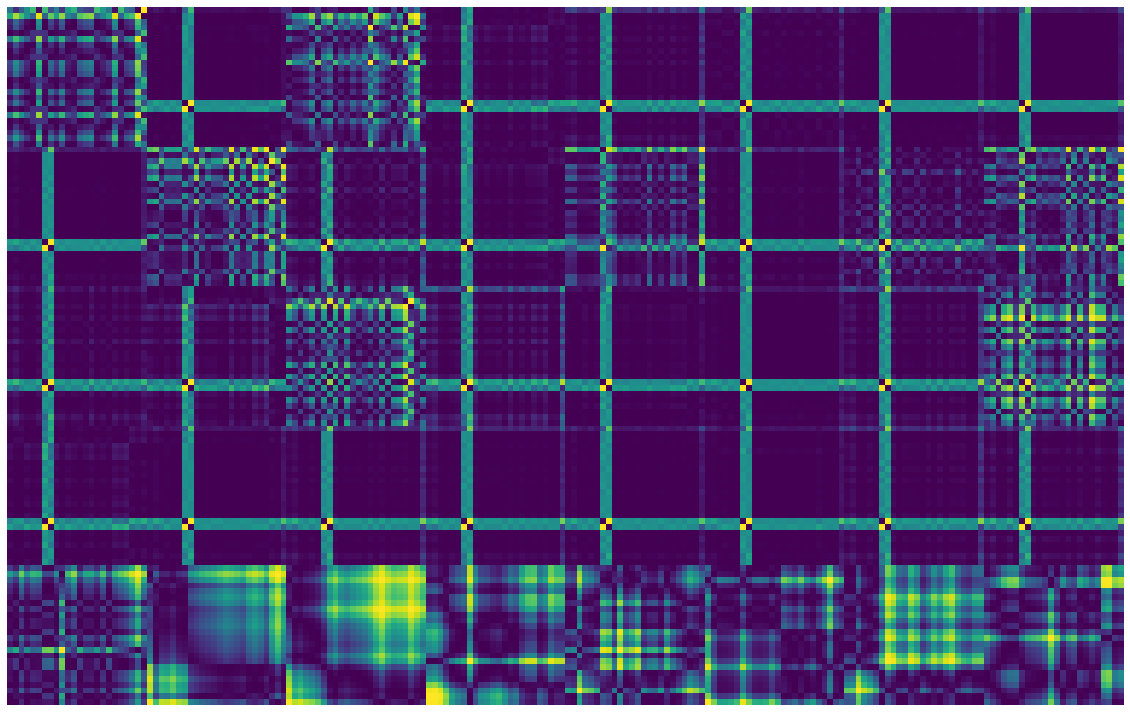

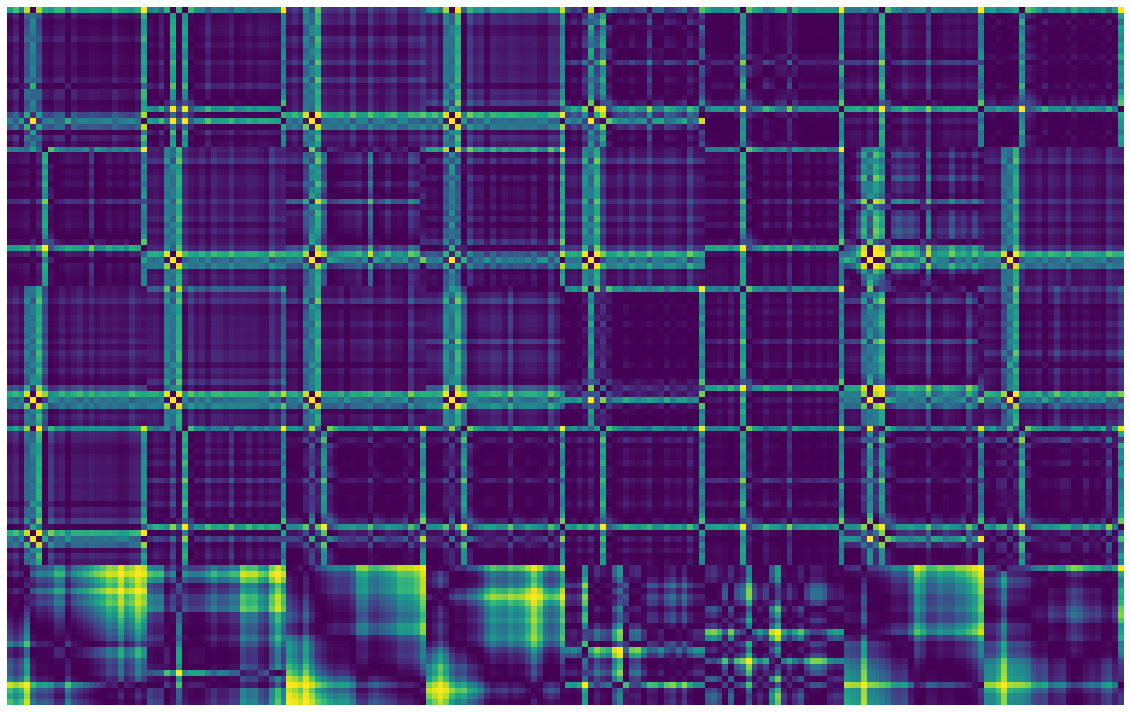

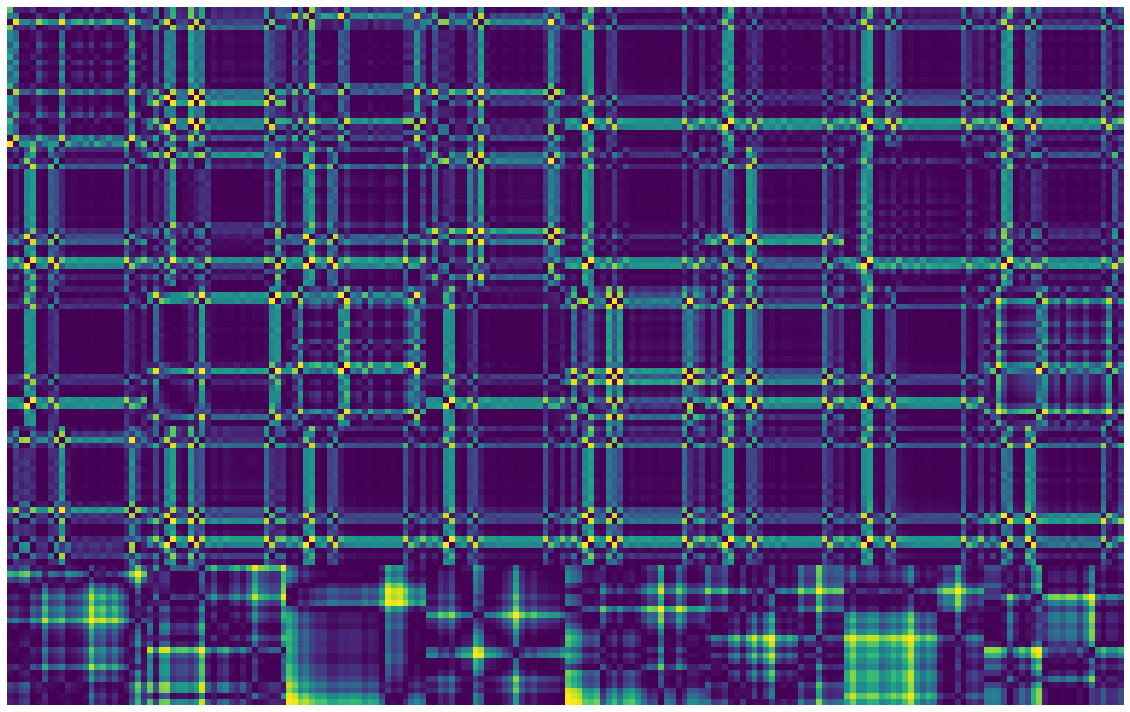

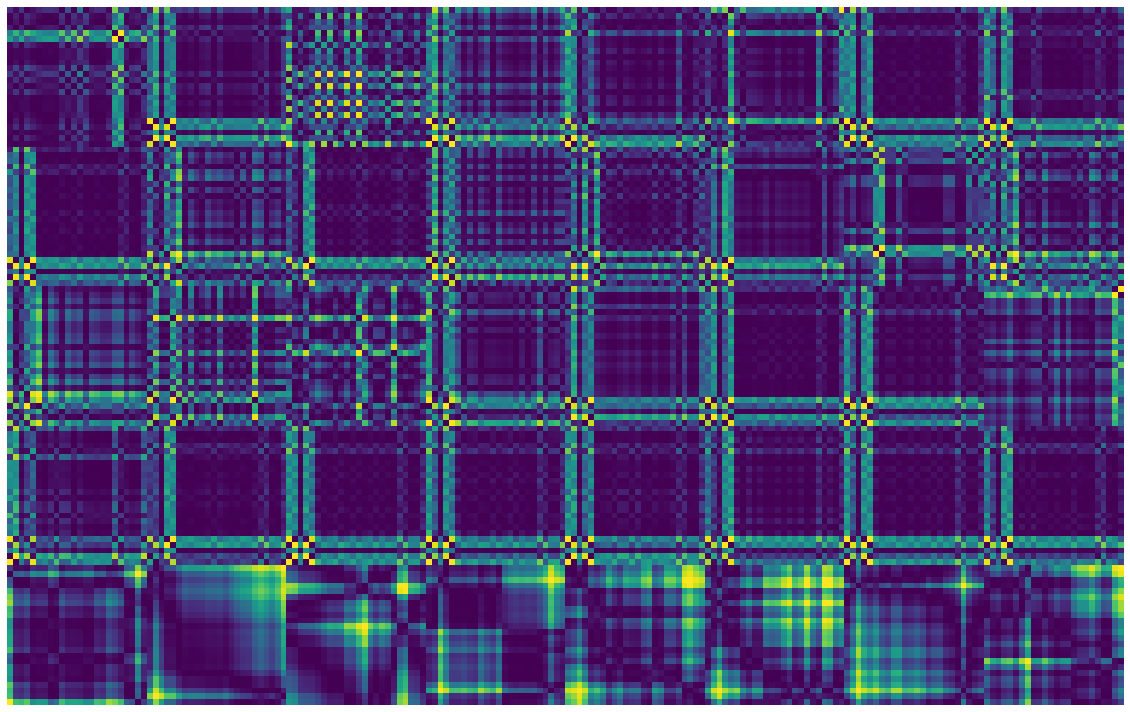

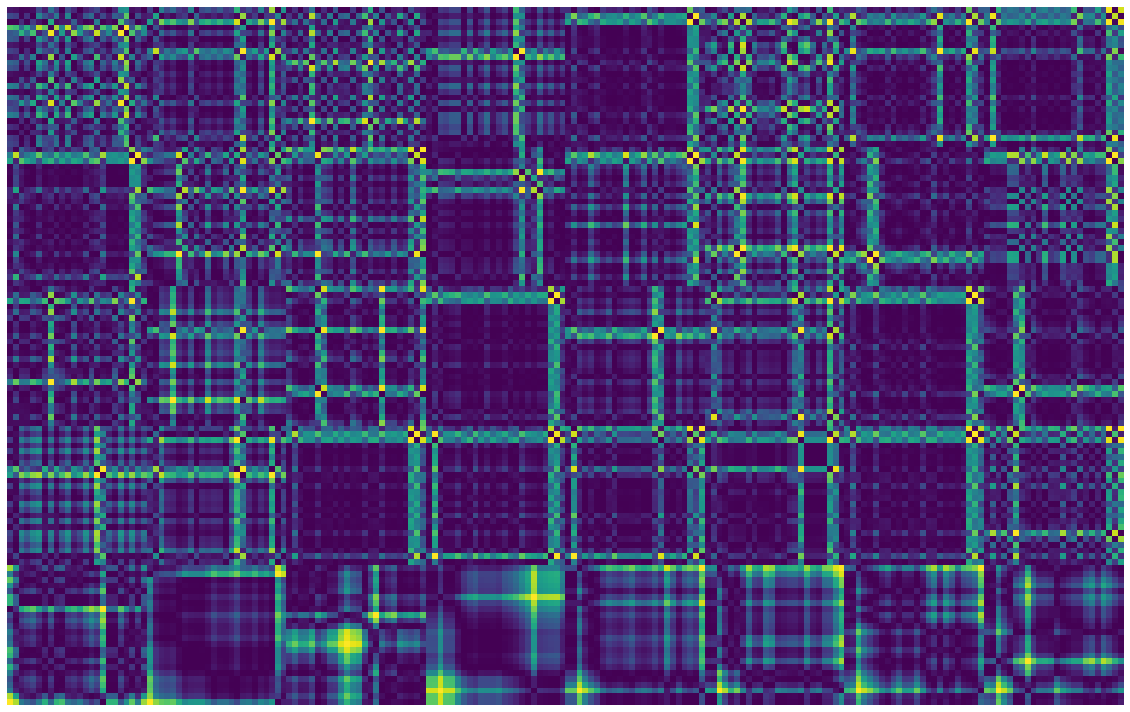

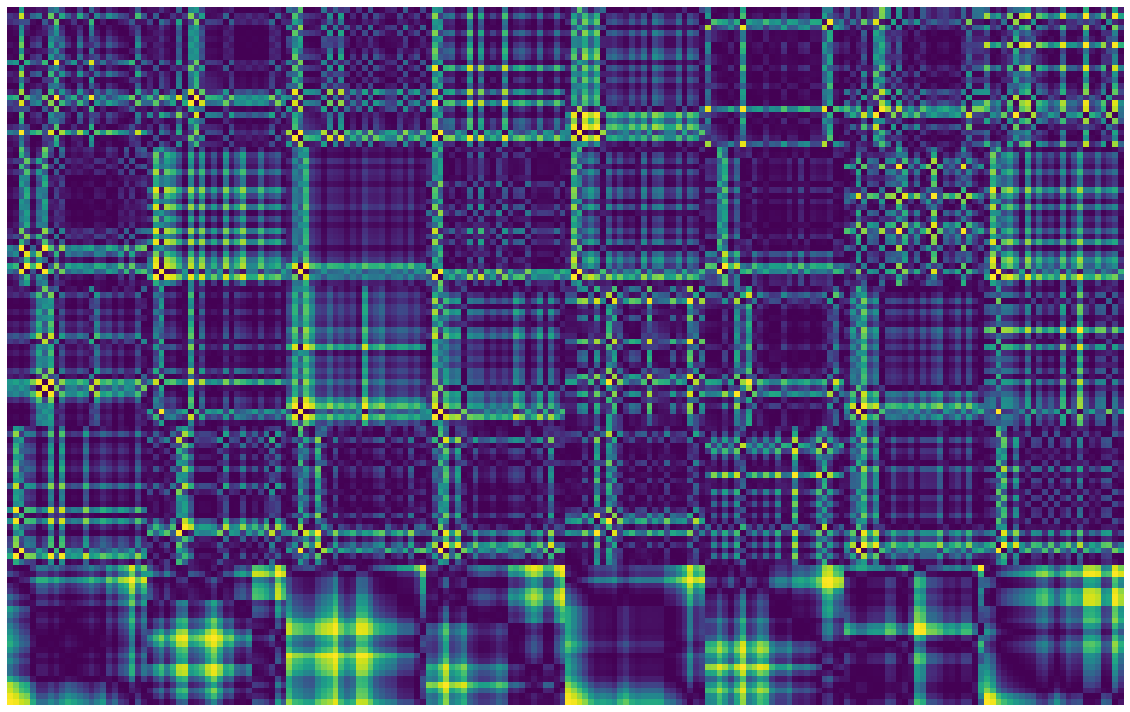

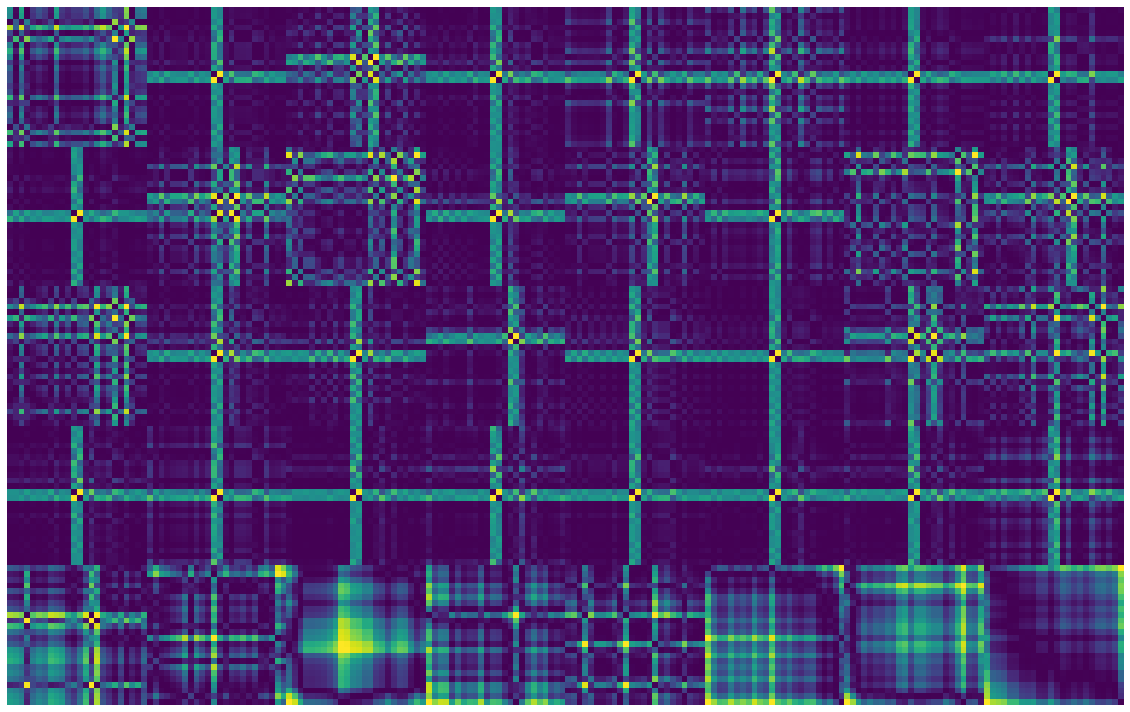

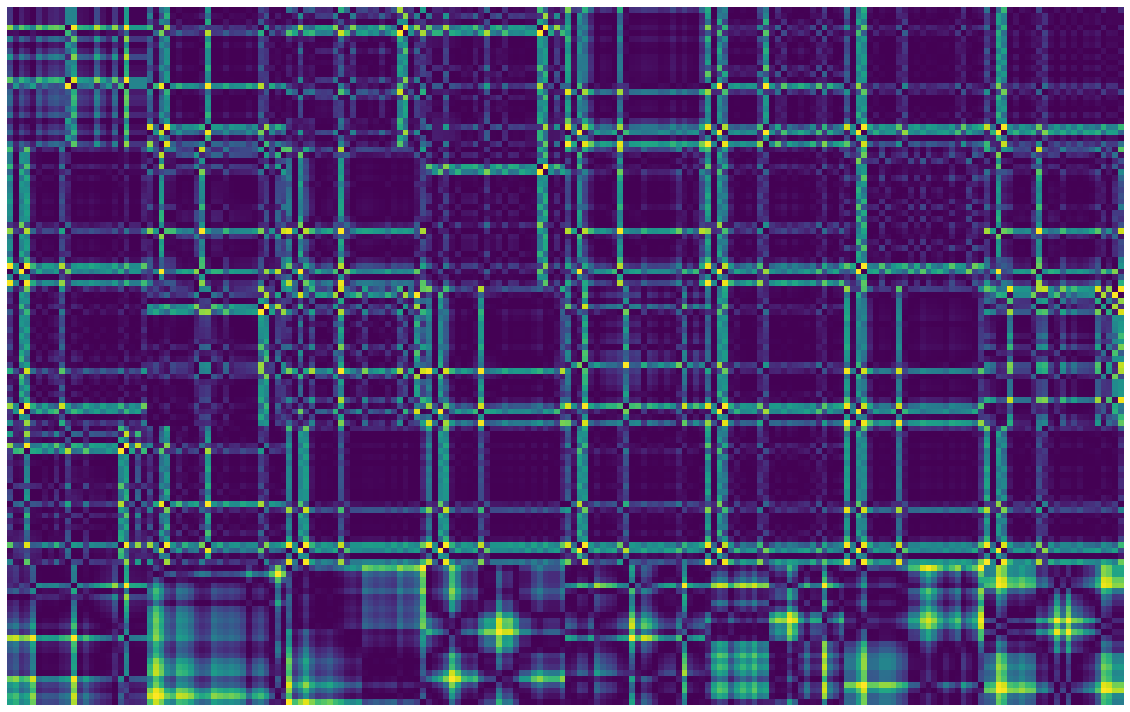

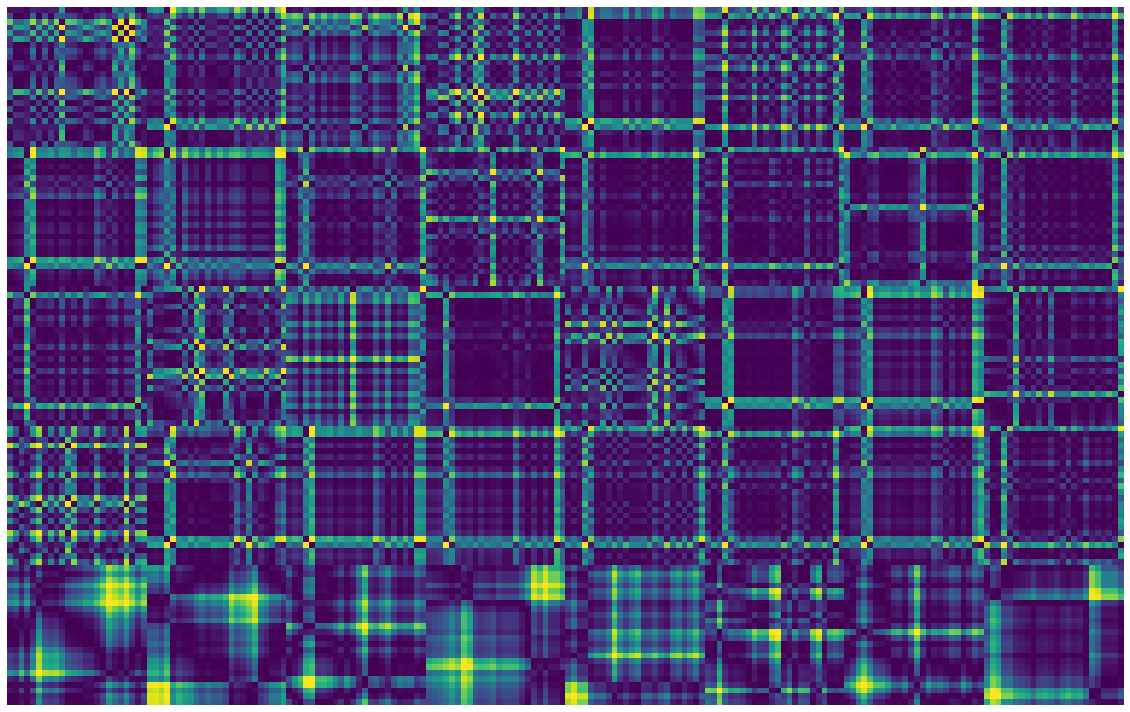

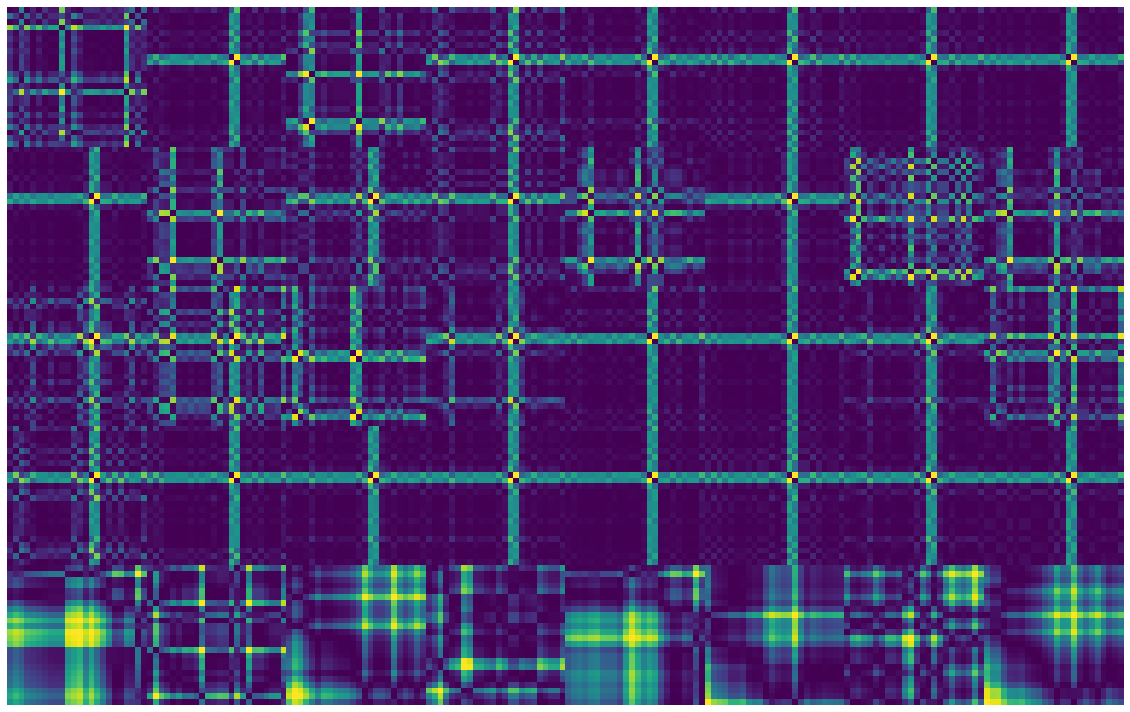

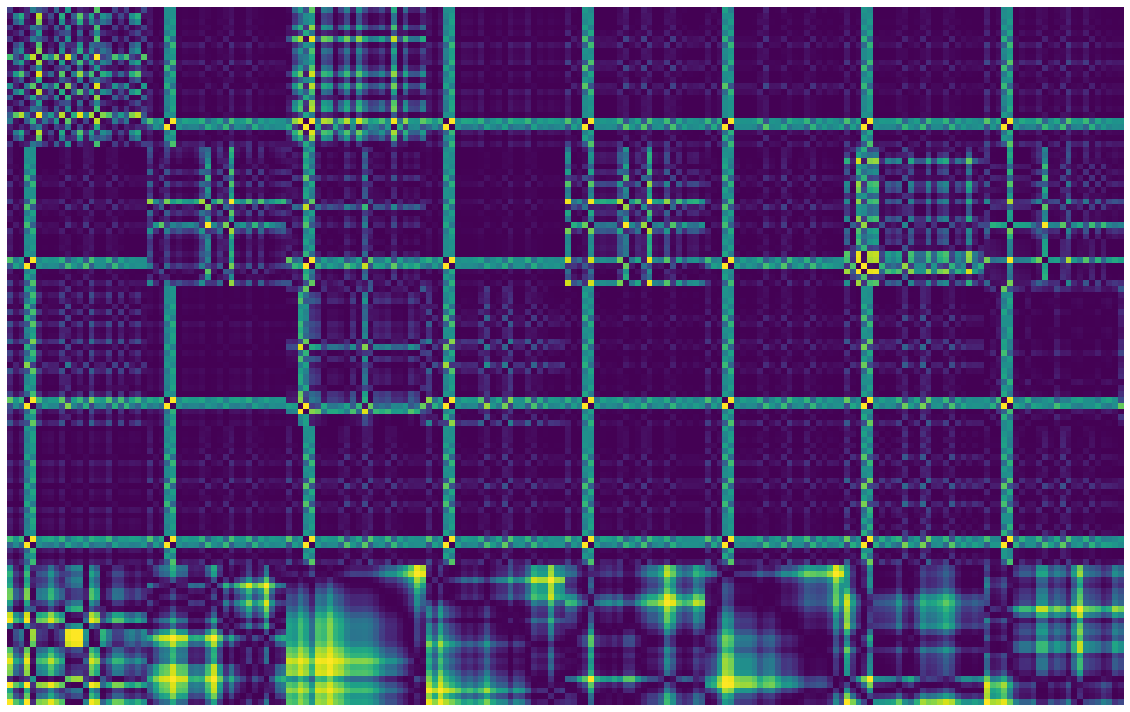

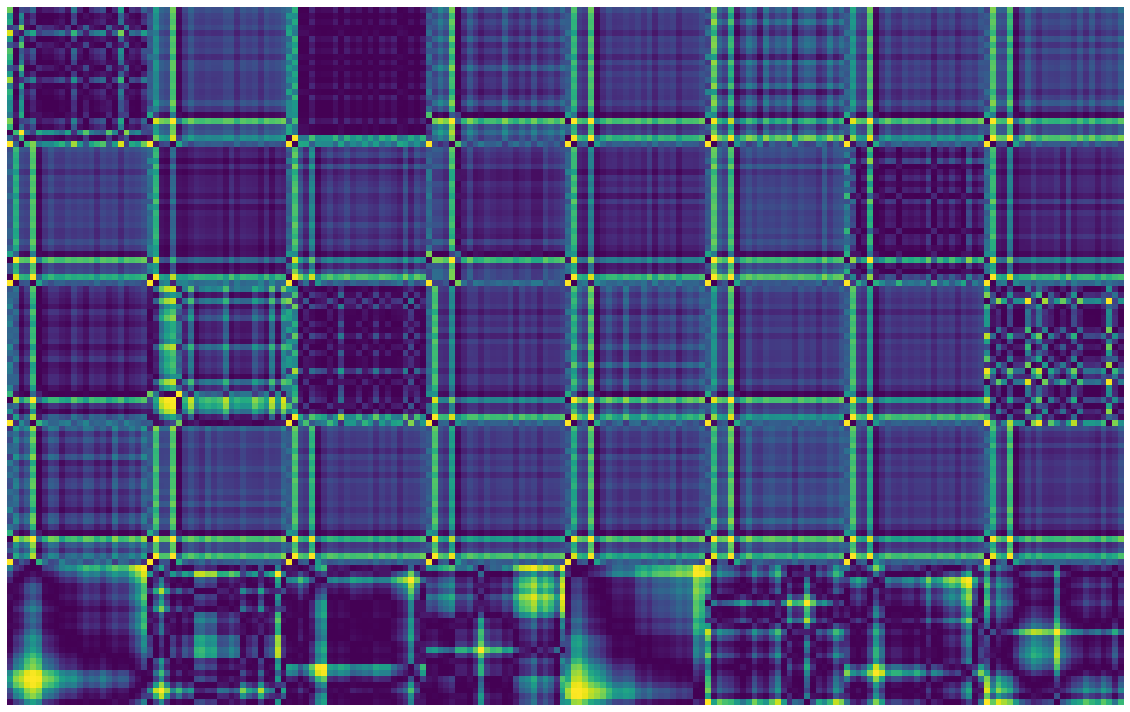

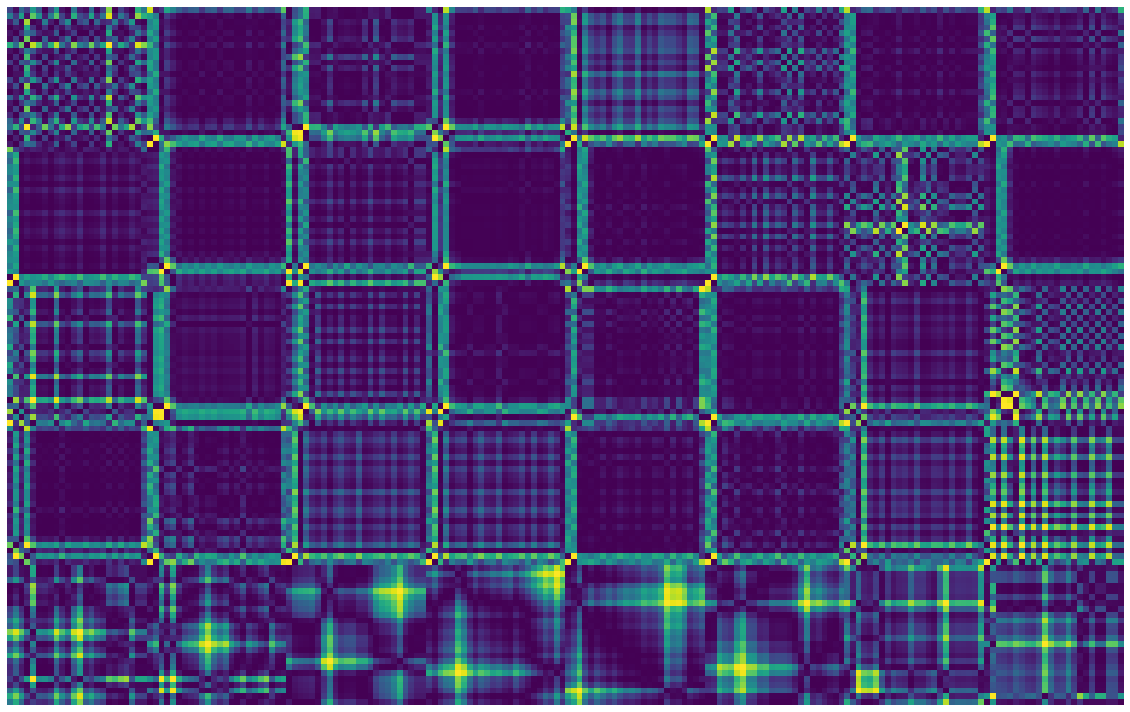

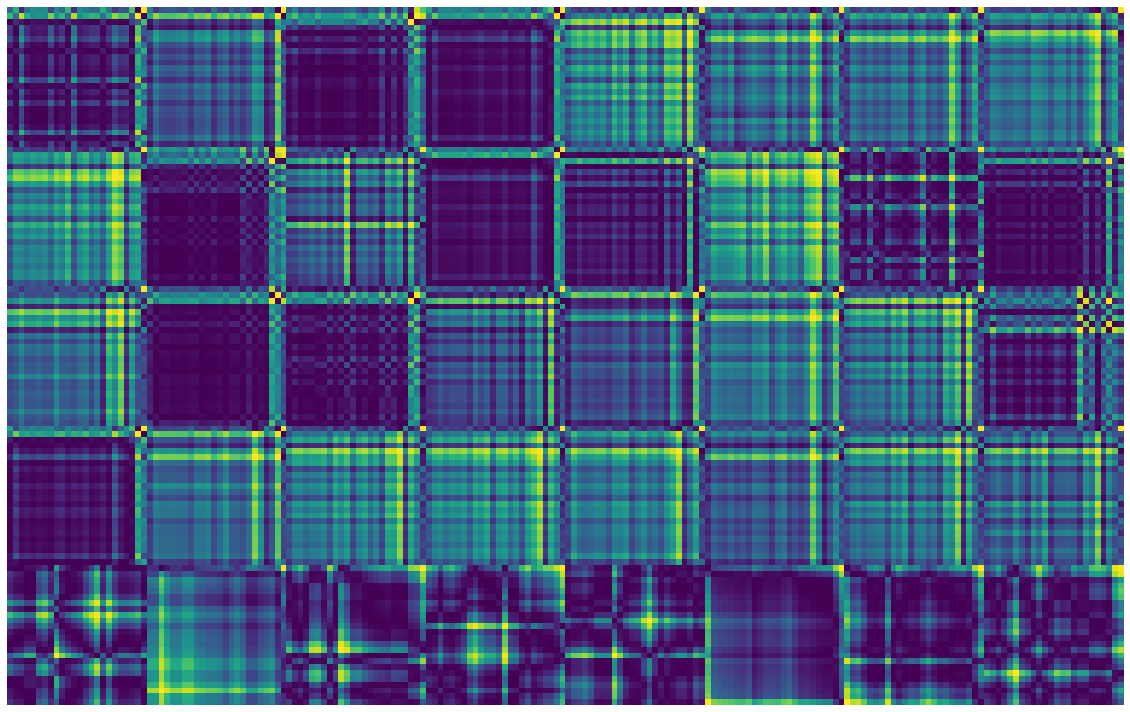

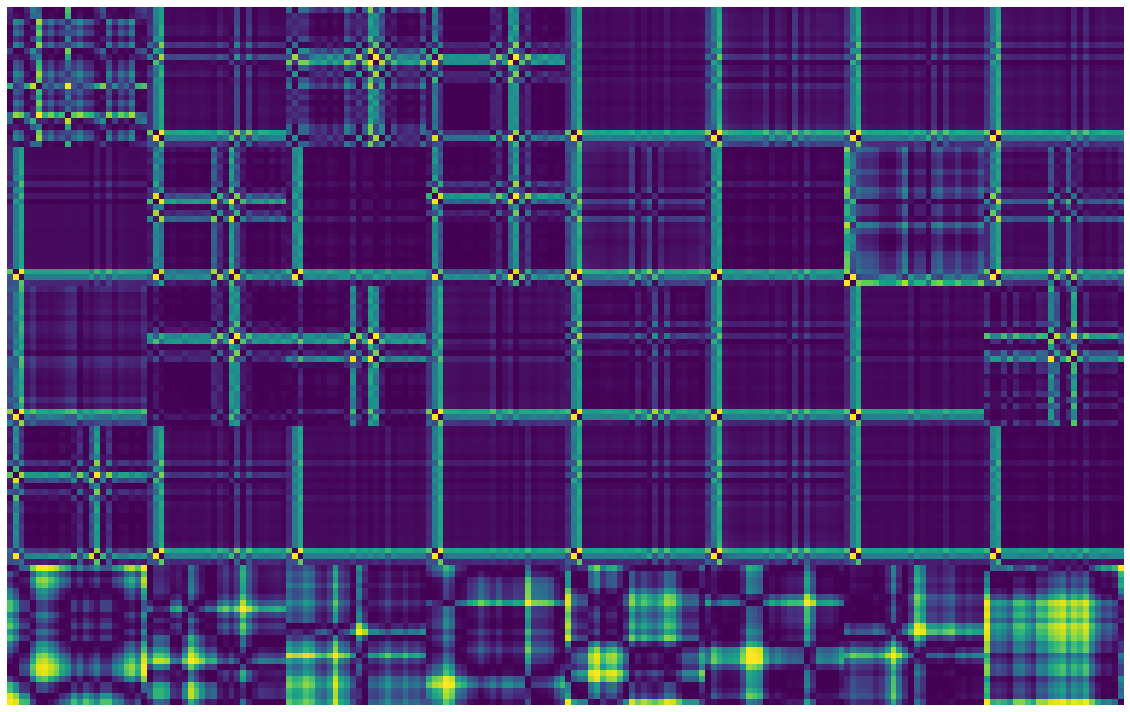

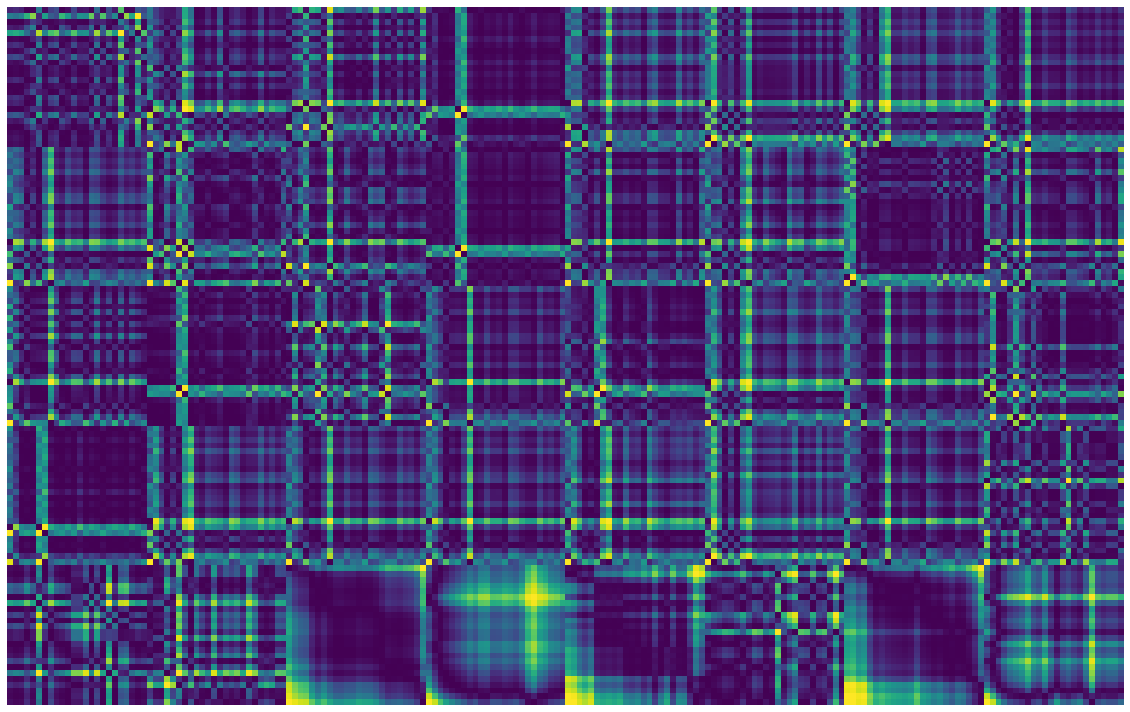

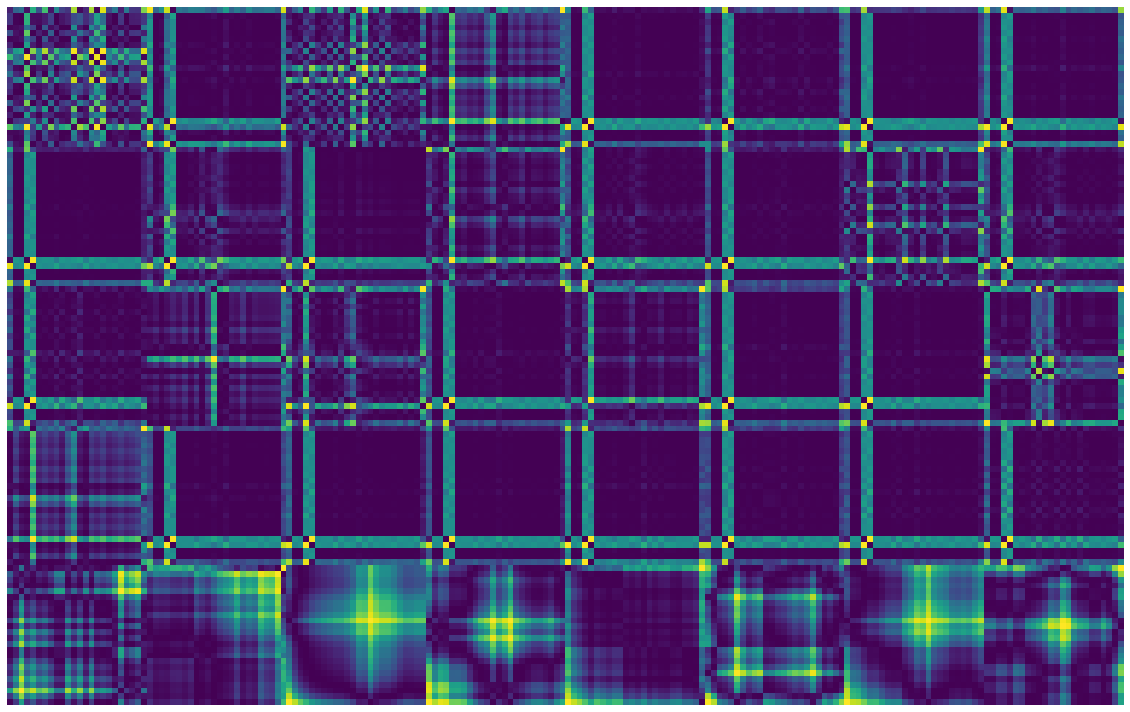

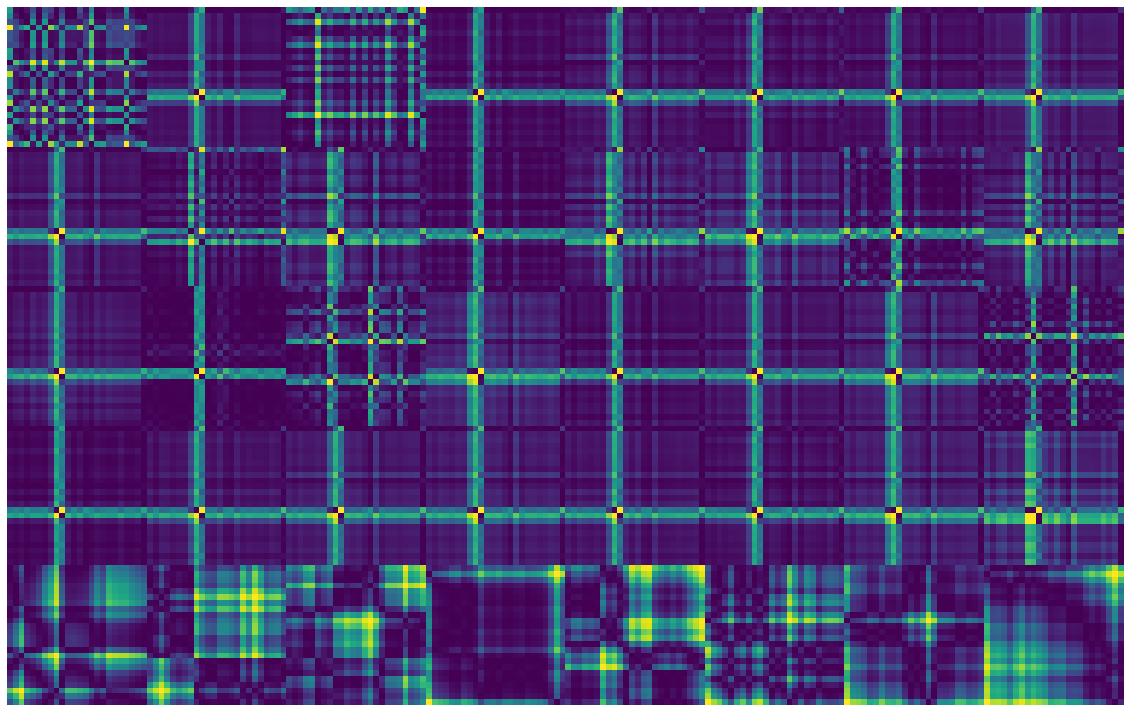

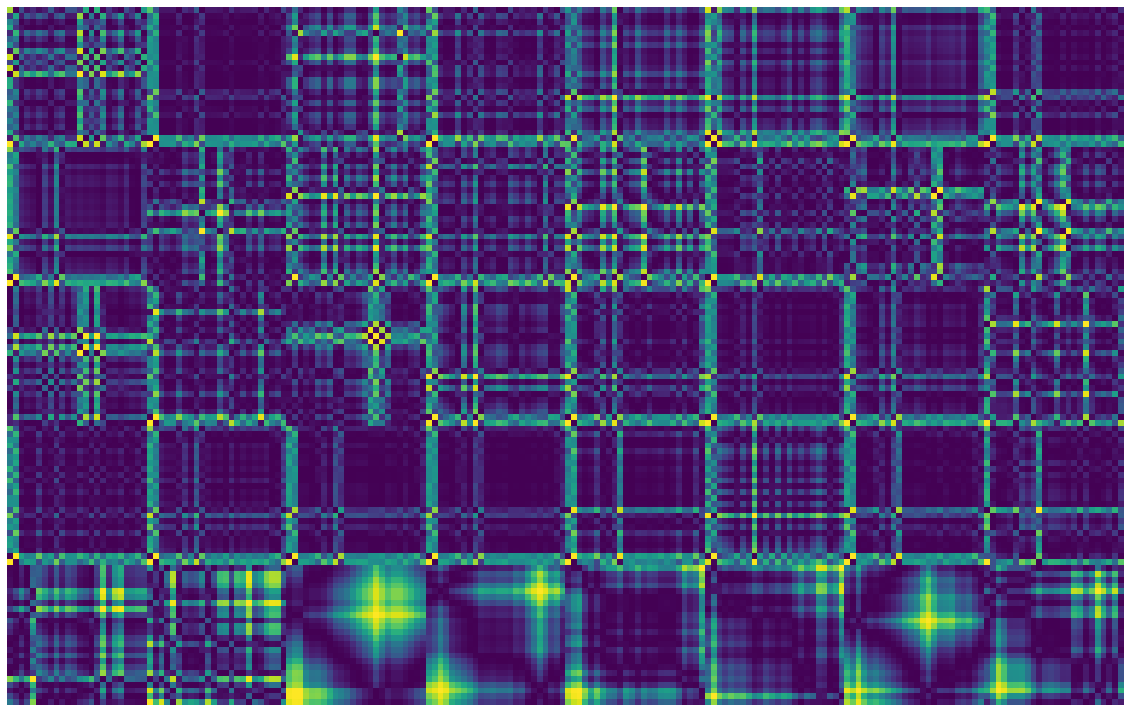

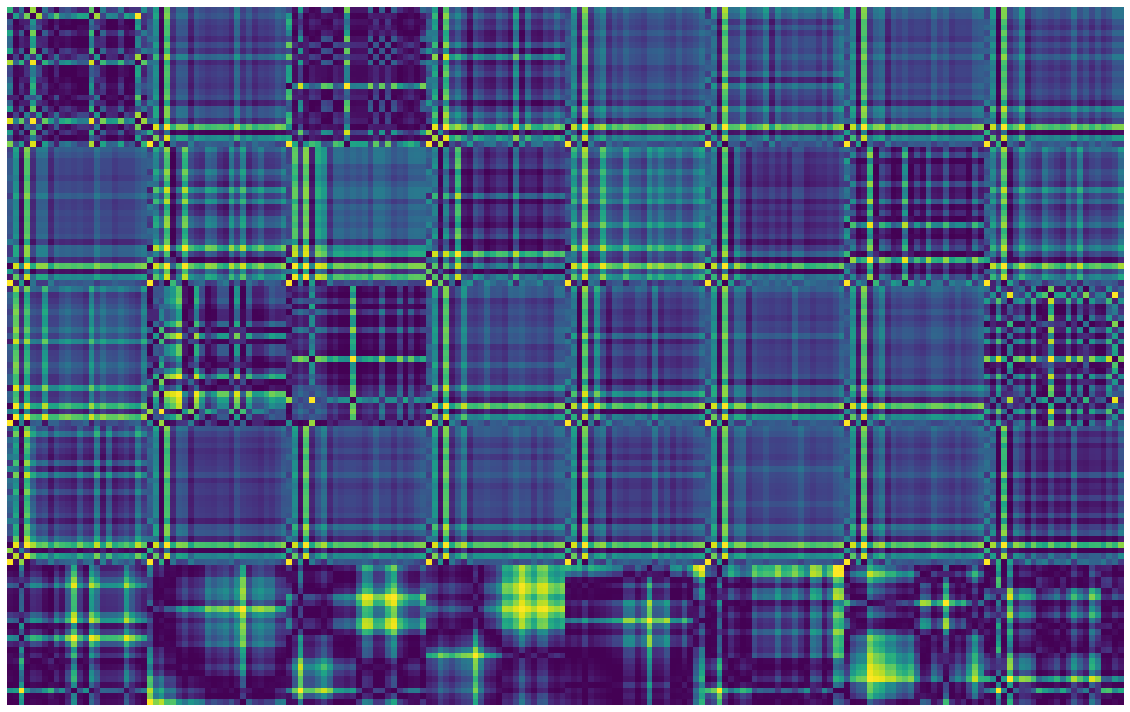

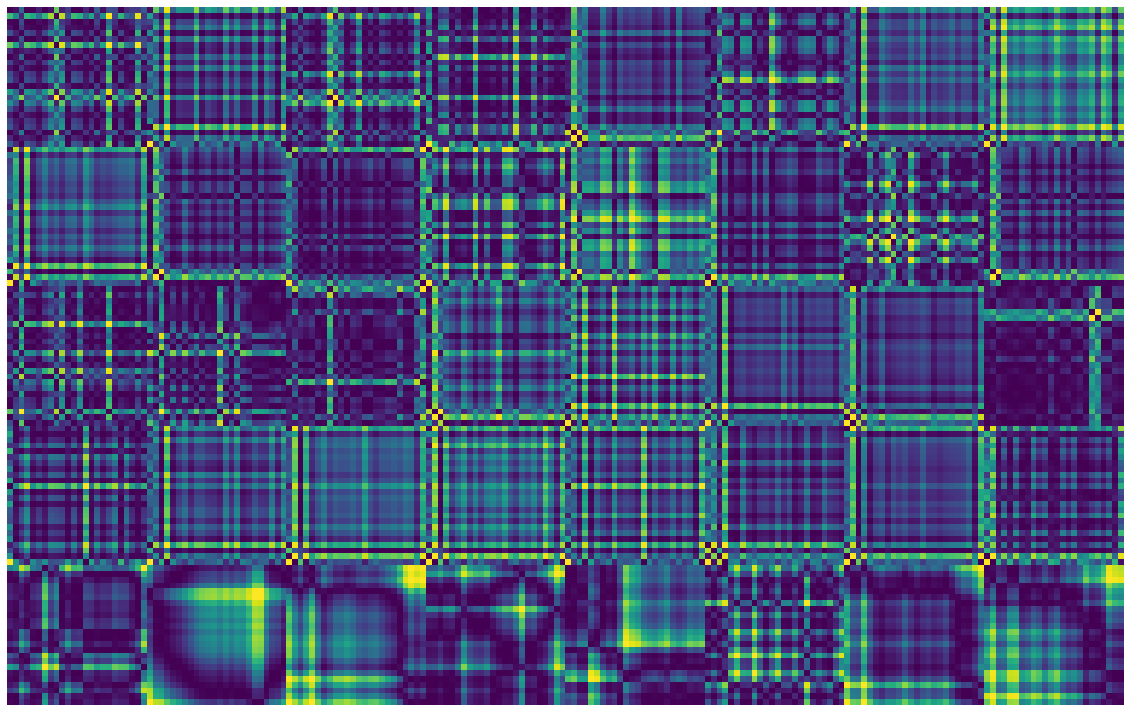

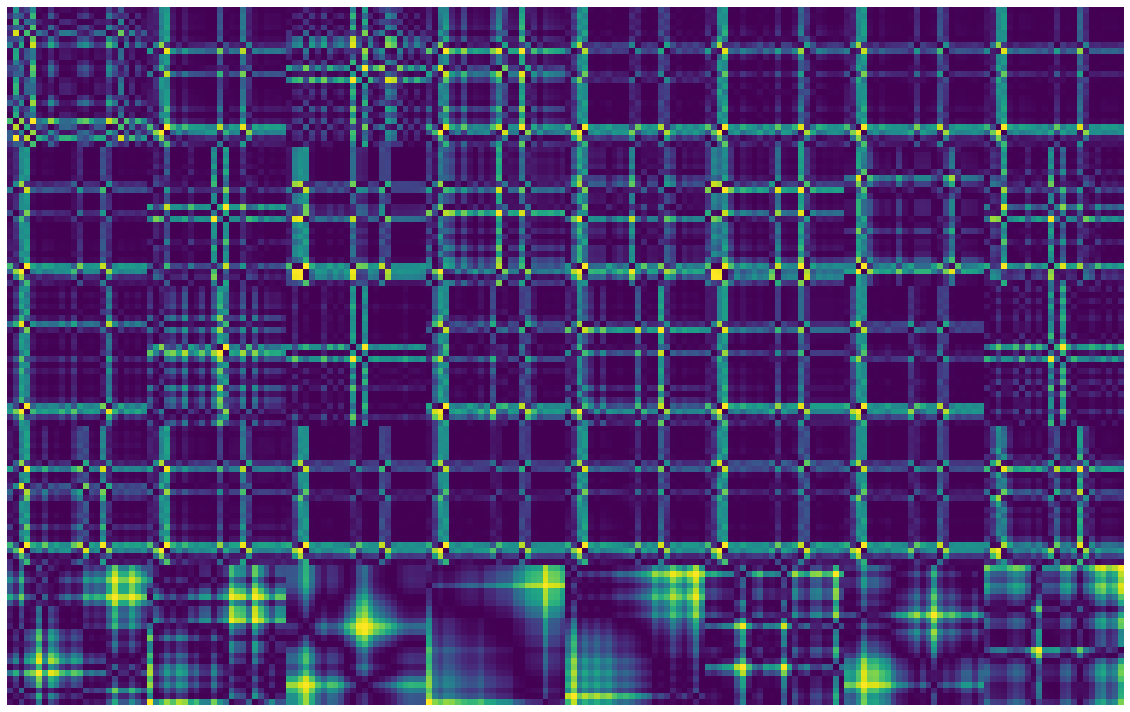

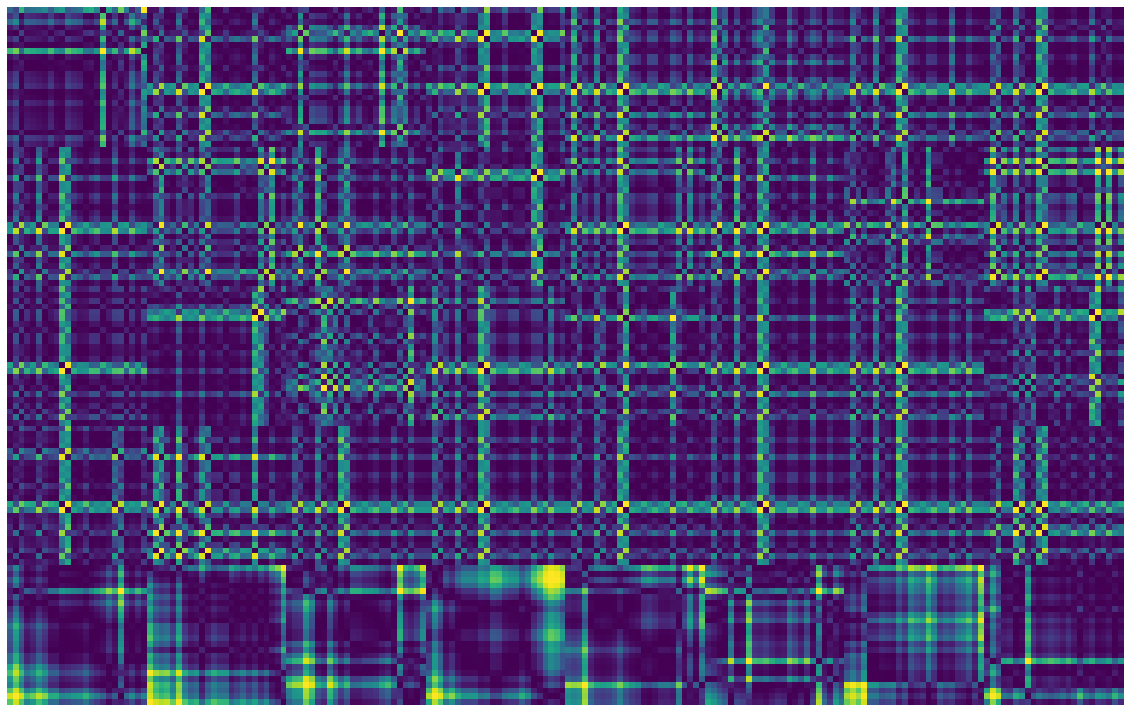

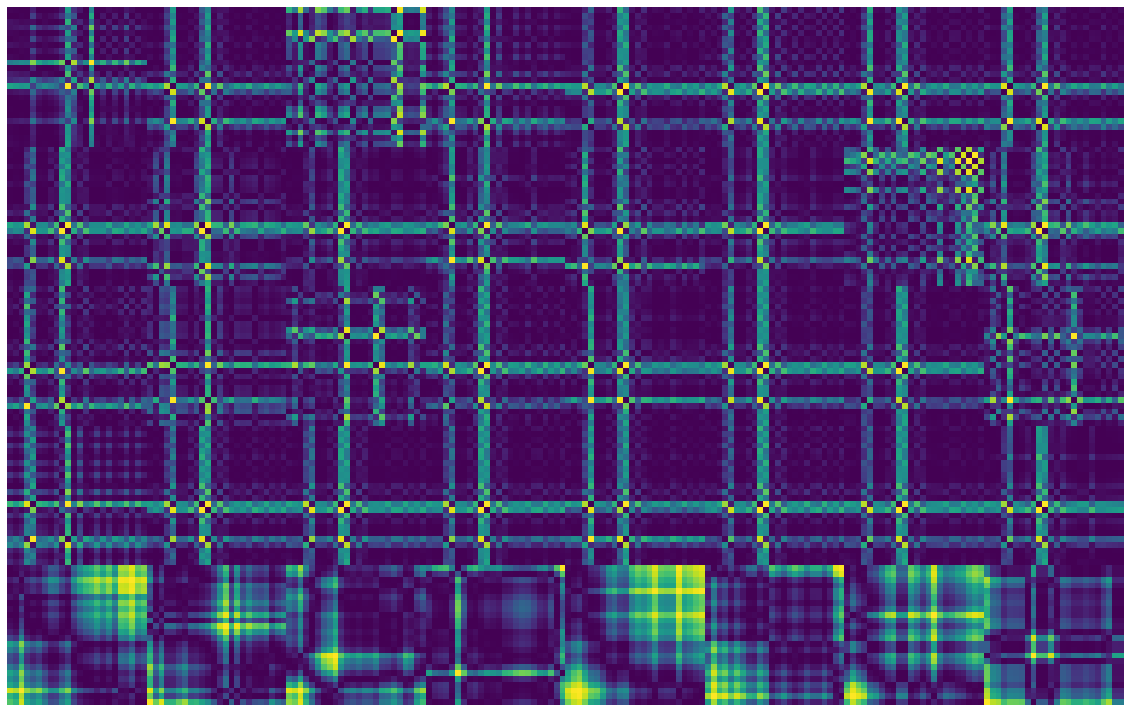

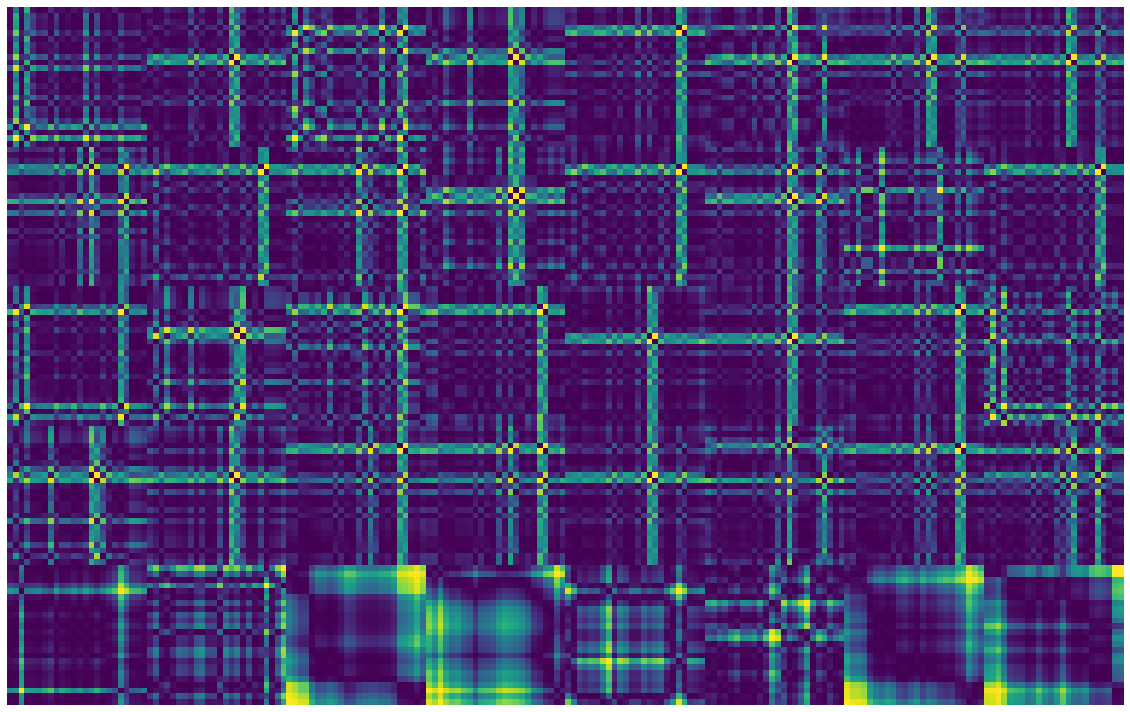

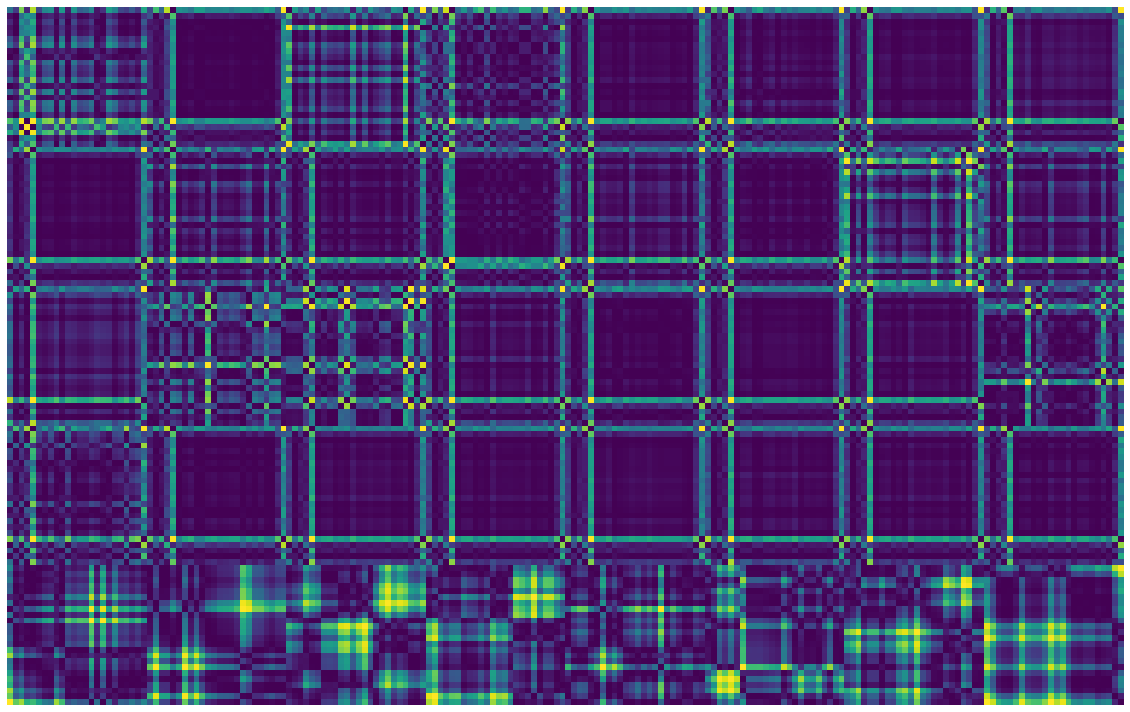

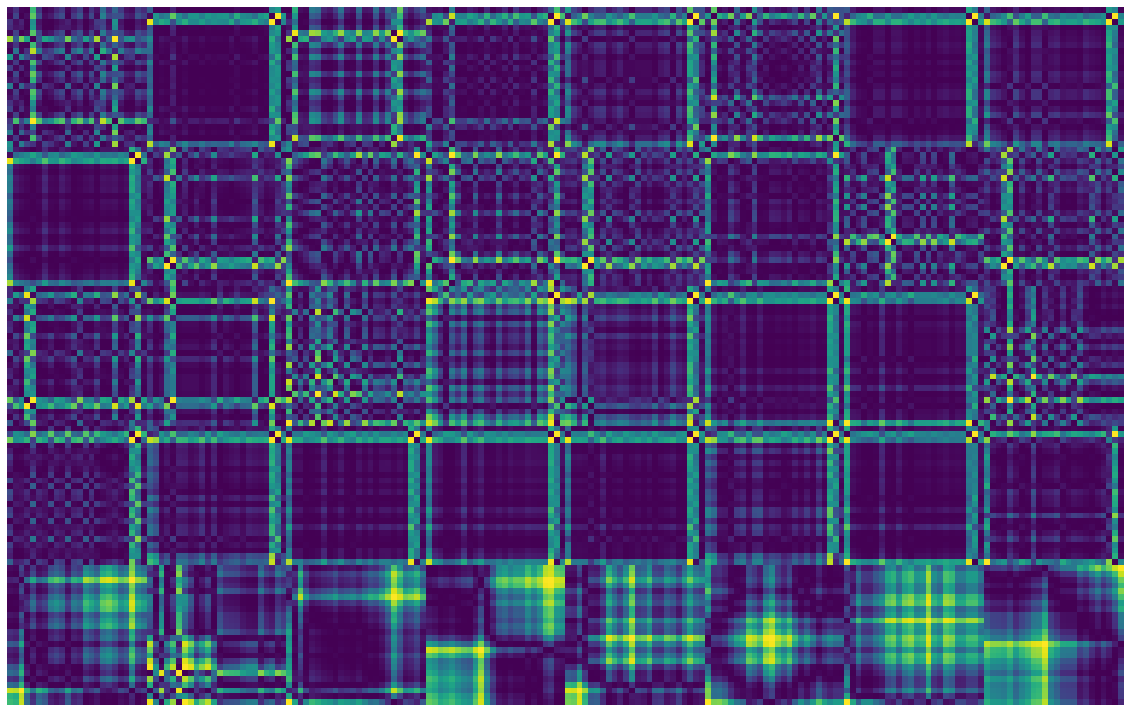

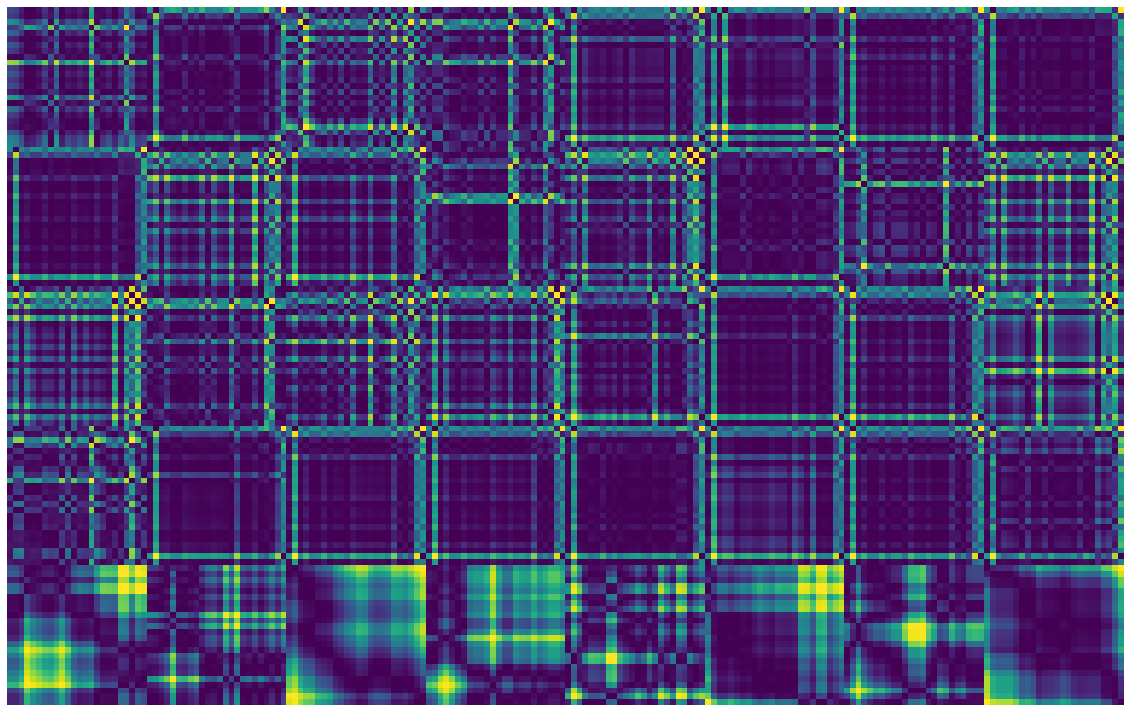

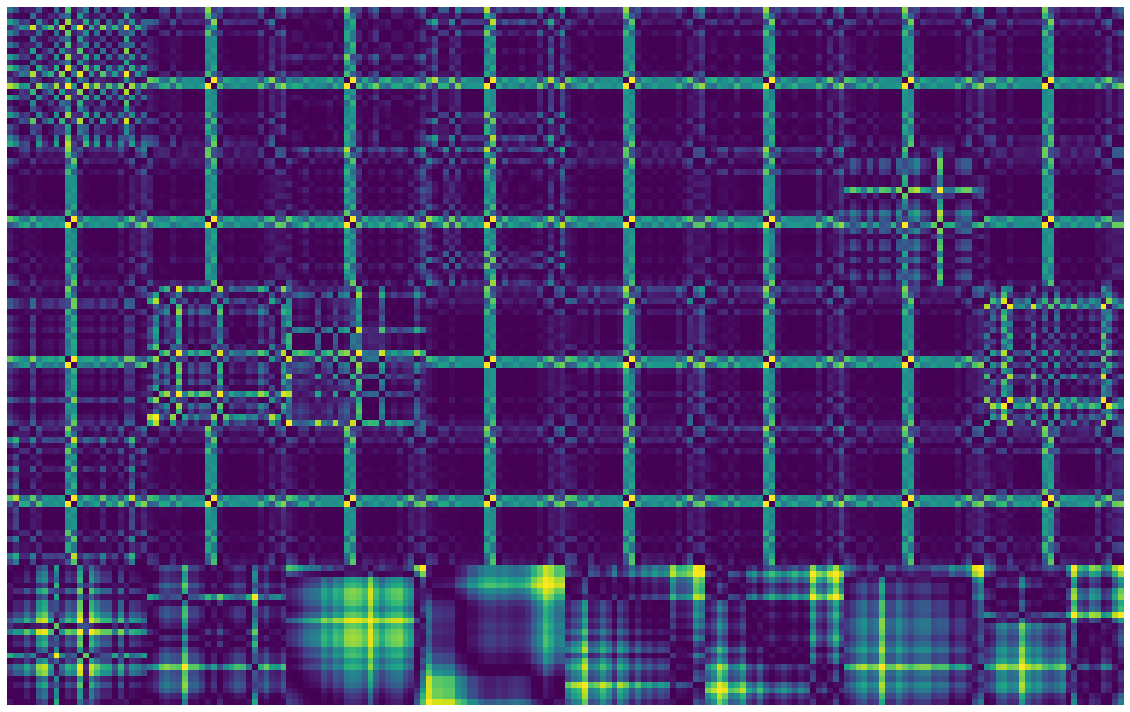

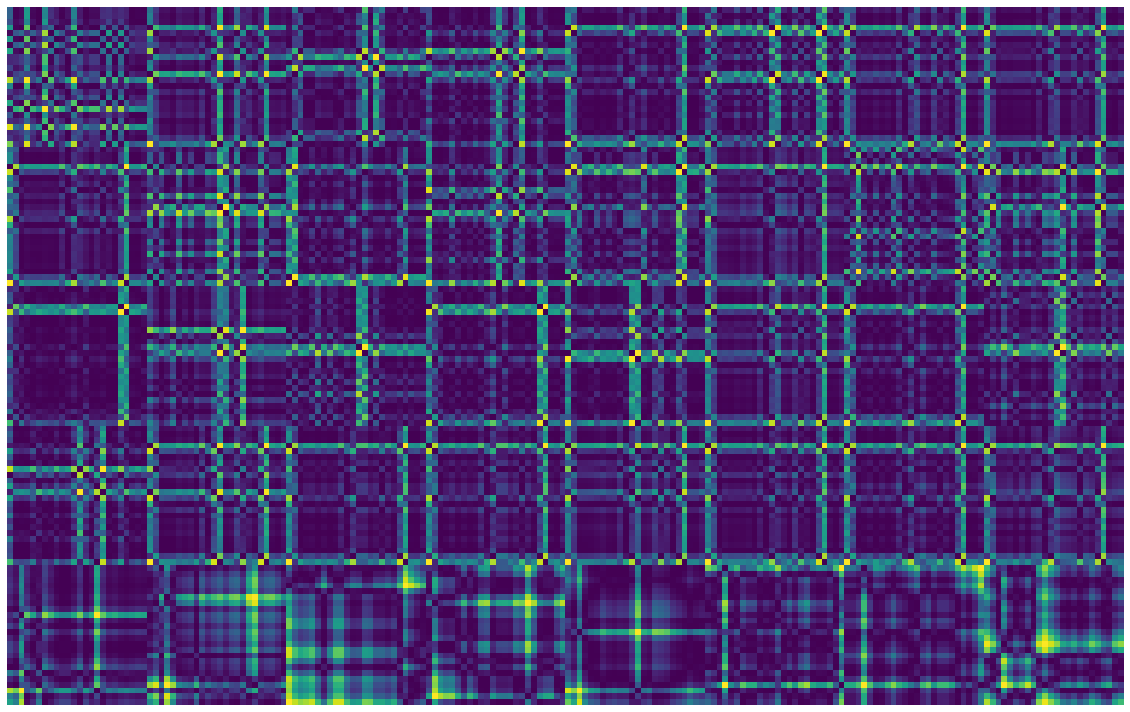

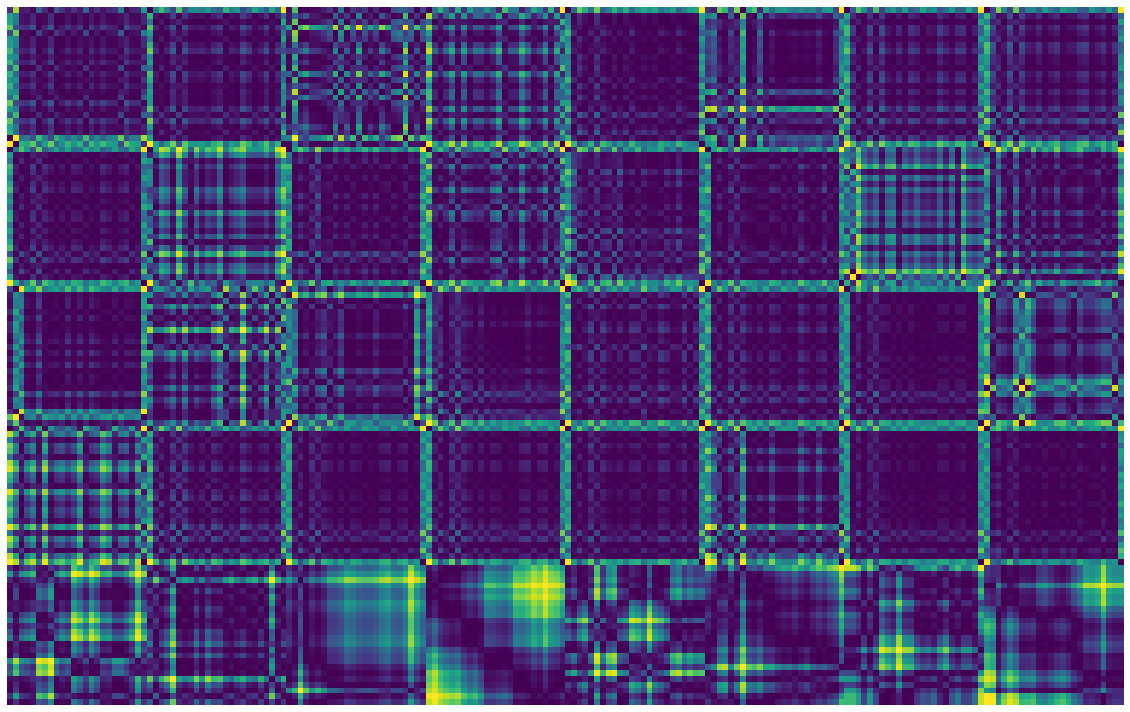

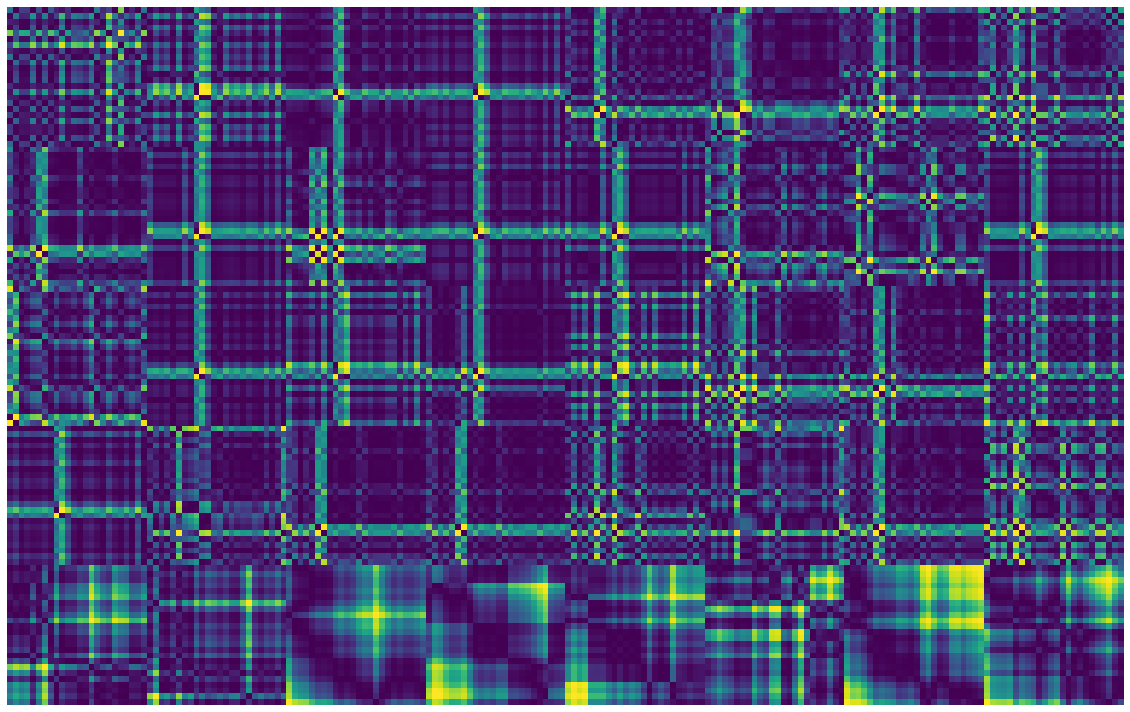

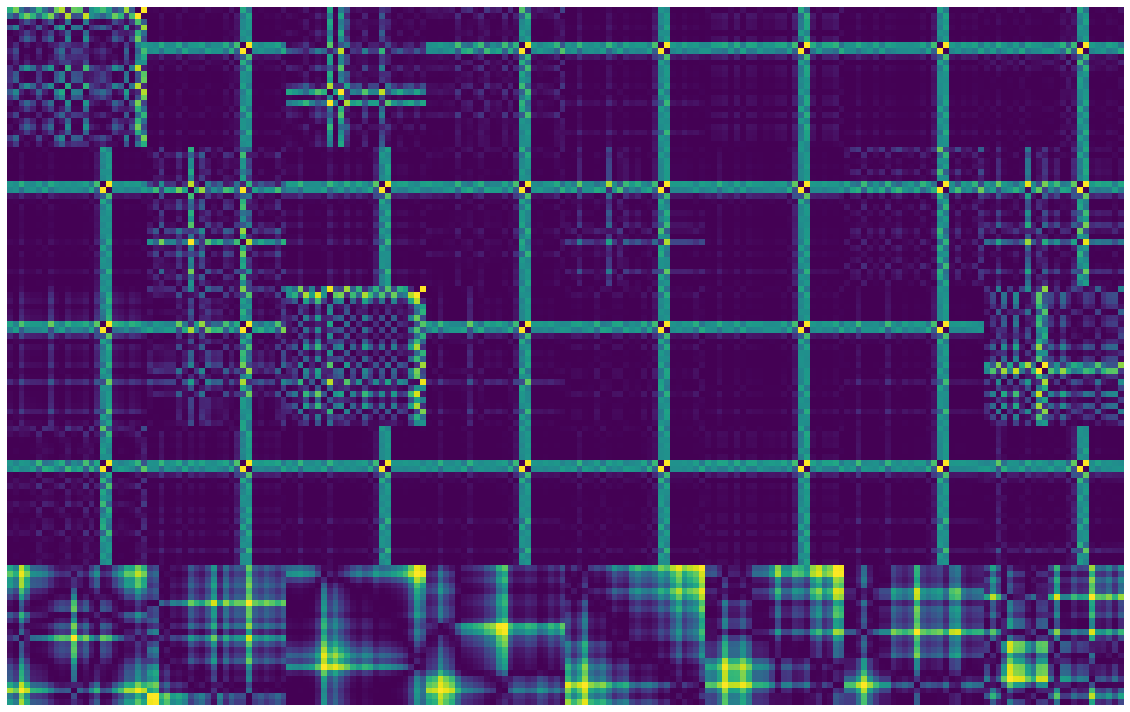

In [206]:
for n in range (0,9): #trying to control the 01 vs 1 vs 10
#for n in range (9,40):
    data_one_trial=data[n,:,:]
    # Transform the time series into Gramian Angular Fields
    gasf = GramianAngularField(image_size=24, method='summation')
    X_gasf = gasf.fit_transform(data_one_trial)
    #gadf = GramianAngularField(image_size=24, method='difference')
    #X_gadf = gadf.fit_transform(data_one_trial)


    w = 10
    h = 10
    fig = plt.figure(figsize=(20, 13))
    columns = 8
    rows = 5



    # ax enables access to manipulate each of subplots
    ax = []

    for i in range(columns*rows):
        img = X_gasf[i]
        # create subplot and append to ax
        ax.append( fig.add_subplot(rows, columns, i+1) )
        #ax[-1].set_title("ax:"+str(i))  # set title
        plt.imshow(img, cmap='viridis', origin='lower') #binary_r
        plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.06)
    plt.savefig('GAF-cmap/S'+str(subject)+'/s'+str(subject)+'_t0'+str(n+1)+'.png', bbox_inches='tight')
    #plt.show()  # finally, render the plot

#for n in range (0,9): #trying to control the 01 vs 1 vs 10
for n in range (9,40):
    data_one_trial=data[n,:,:]
    # Transform the time series into Gramian Angular Fields
    gasf = GramianAngularField(image_size=24, method='summation')
    X_gasf = gasf.fit_transform(data_one_trial)
    #gadf = GramianAngularField(image_size=24, method='difference')
    #X_gadf = gadf.fit_transform(data_one_trial)


    w = 10
    h = 10
    fig = plt.figure(figsize=(20, 13))
    columns = 8
    rows = 5



    # ax enables access to manipulate each of subplots
    ax = []

    for i in range(columns*rows):
        img = X_gasf[i]
        # create subplot and append to ax
        ax.append( fig.add_subplot(rows, columns, i+1) )
        #ax[-1].set_title("ax:"+str(i))  # set title
        plt.imshow(img, cmap='viridis', origin='lower') #binary_r
        plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.06)
    plt.savefig('GAF-cmap/S'+str(subject)+'/s'+str(subject)+'_t'+str(n+1)+'.png', bbox_inches='tight')
    #plt.show()  # finally, render the plot

![I know its a nested loop](https://media.giphy.com/media/N2rLxtwaU9rBC/giphy.gif "yes a nested loop")

# END